# Google Colab에서 한글 폰트를 사용하기 위한 준비코드

Google colab에서 한글 폰트를 사용하기 위해서는 아래의 코드를 실행한 후 runtime을 재실행해야 합니다.


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


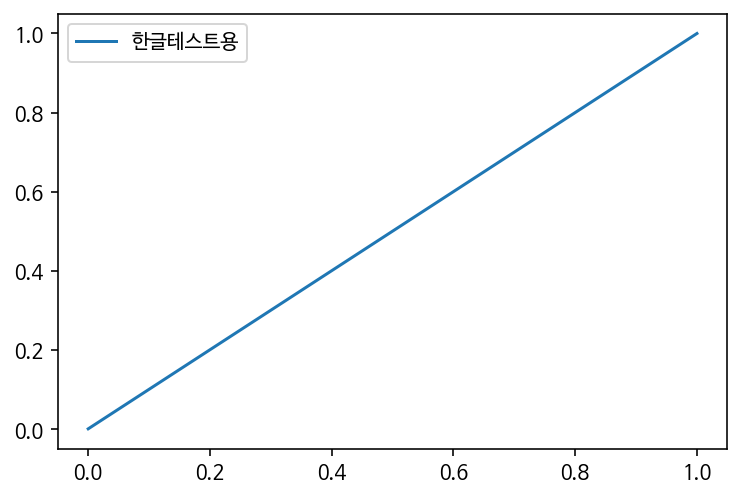

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina' 
 
!apt -qq -y install fonts-nanum  # Font 설치
 
# matplotlib font setting
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 폰트 경로설정
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

# matplot 화면 보이기
%matplotlib inline

# figsize 를 전역으로 설정
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

# Bigcontest 데이터 전처리 시작!

In [3]:
# Library import
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import plotly
import folium

# Google Drive Mount
from google.colab import drive
drive.mount("/content/drive")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [4]:
cd drive/My Drive

/content/drive/My Drive


In [5]:
ls

'저장된 데이터로 학습하기19- model12로 data_1000으로 학습해보기.ipynb'
'1. Backup Files'/
'2020빅콘테스트 문제데이터(혁신아이디어분야)'/
'저장된 데이터로 학습하기20 -spark model2로 data_1000으로 학습시켜보기.ipynb'
'2. Classroom : 빅데이터 인공지능'/
'3. Machine Learning on XPS data'/
'Anyfile Notepad Files'/
'Bigcontest 데이터분석'/
 cgcnn-master/
'CGCNN 논문발표_박형선.pptx'
'[과제] 다른 텍스트 데이터를 이용한 키워드 분석.ipynb'
'[과제] 신경망 성능 높이기 (텐서보드).ipynb'
 졸업논문_수정의_사본_성흠씨.ipynb
'Python 시각화 데이터프레임 공부'/


In [6]:
cd 2020빅콘테스트 문제데이터(혁신아이디어분야)

/content/drive/My Drive/2020빅콘테스트 문제데이터(혁신아이디어분야)


In [7]:
ls -lh

total 20K
drwx------ 2 root root 4.0K Aug 13 14:49 '01_유동인구데이터(SK텔레콤)'/
drwx------ 2 root root 4.0K Aug 13 14:49 '02_카드매출데이터(신한카드)'/
drwx------ 2 root root 4.0K Aug 13 14:49 '03_SNS데이터(와이즈넛)'/
drwx------ 2 root root 4.0K Aug 13 14:49 '04_유통데이터(GS리테일)'/
drwx------ 2 root root 4.0K Aug 13 14:49 '05_물류데이터(CJ올리브네트웍스)'/


## 04_유통데이터(GS리테일) 데이터 전처리

In [8]:
cd /content/drive/My Drive/2020빅콘테스트 문제데이터(혁신아이디어분야)/04_유통데이터(GS리테일)

/content/drive/My Drive/2020빅콘테스트 문제데이터(혁신아이디어분야)/04_유통데이터(GS리테일)


In [9]:
ls 

'04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx'


### 데이터정의서 1 읽기

In [10]:
df1 = pd.read_excel('04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx', sheet_name = '테이블정의서',
                    header = 1)
df1.head() # 테이블정의서

,Unnamed: 0,테이블 정의서,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,테이블명,NaN,"일자별 행정동별 매출지수, 카테고리 비중",NaN,테이블ID,TB_DD_STR_PURCH_CLS
1,NaN,테이블개요,NaN,[적재주기 : 일단위] \n기준년월일의 기준지역 내 점포들의 영업일자별 구매금액을 ...,NaN,NaN,NaN
2,NaN,특기사항,NaN,"1. 기간 : '19년 2월 1일~'19년 5월 31일, '20년 2월 1일~'20...",NaN,NaN,NaN
3,NaN,순서,컬럼ID,NaN,컬럼명,물리데이터타입,비고
4,NaN,1,OPER_DT,NaN,영업일자,VARCHAR(8),NaN


In [11]:
df1.columns

Index(['Unnamed: 0', '테이블 정의서', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [12]:
del df1['Unnamed: 0']
df1.head() # 테이블 정의서

,테이블 정의서,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,테이블명,NaN,"일자별 행정동별 매출지수, 카테고리 비중",NaN,테이블ID,TB_DD_STR_PURCH_CLS
1,테이블개요,NaN,[적재주기 : 일단위] \n기준년월일의 기준지역 내 점포들의 영업일자별 구매금액을 ...,NaN,NaN,NaN
2,특기사항,NaN,"1. 기간 : '19년 2월 1일~'19년 5월 31일, '20년 2월 1일~'20...",NaN,NaN,NaN
3,순서,컬럼ID,NaN,컬럼명,물리데이터타입,비고
4,1,OPER_DT,NaN,영업일자,VARCHAR(8),NaN


### 데이터정의서 2 읽기

In [13]:
df2 = pd.read_excel('04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx',
                       sheet_name = '참고)구_행정동코드', header = 1)
df2.head()

,Unnamed: 0,시코드,시명,구코드,구명,행정동코드,행정동명
0,NaN,11,서울특별시,1114,중구,11140520,소공동
1,NaN,11,서울특별시,1114,중구,11140540,회현동
2,NaN,11,서울특별시,1114,중구,11140550,명동
3,NaN,11,서울특별시,1114,중구,11140570,필동
4,NaN,11,서울특별시,1114,중구,11140580,장충동


In [14]:
df2.columns

Index(['Unnamed: 0', '시코드', '시명', '구코드', '구명', '행정동코드', '행정동명'], dtype='object')

In [15]:
del df2['Unnamed: 0'] # 필요없는 컬럼 삭제

In [16]:
df2.head() # 테이블 정의서

,시코드,시명,구코드,구명,행정동코드,행정동명
0,11,서울특별시,1114,중구,11140520,소공동
1,11,서울특별시,1114,중구,11140540,회현동
2,11,서울특별시,1114,중구,11140550,명동
3,11,서울특별시,1114,중구,11140570,필동
4,11,서울특별시,1114,중구,11140580,장충동


In [17]:
df2['시코드'].value_counts() # 시코드의 value 구성을 확인해본다.

11    33
27    27
Name: 시코드, dtype: int64

In [18]:
df2['시명'].value_counts() # 시명의 value 구성을 확인해본다.
# 즉, 서울특별시는 코드 33, 대구광역시는 코드 27로 매칭되어 있으며, 두 컬럼은 사실상 동일한 정보를 나타내므로 중복컬럼을 하나 제거할 수 있다.

서울특별시    33
대구광역시    27
Name: 시명, dtype: int64

In [19]:
del df2['시코드']

In [78]:
df2

,시명,구코드,구명,행정동코드,행정동명
0,서울특별시,1114,중구,11140520,소공동
1,서울특별시,1114,중구,11140540,회현동
2,서울특별시,1114,중구,11140550,명동
3,서울특별시,1114,중구,11140570,필동
4,서울특별시,1114,중구,11140580,장충동
5,서울특별시,1114,중구,11140590,광희동
6,서울특별시,1114,중구,11140605,을지로동
7,서울특별시,1114,중구,11140615,신당동
8,서울특별시,1114,중구,11140625,다산동
9,서울특별시,1114,중구,11140635,약수동


In [21]:
df2['구명'].value_counts() # 구의 이름은 중구, 수성구, 노원구 3개의 구가 있는것 같지만,,

중구     22
수성구    20
노원구    18
Name: 구명, dtype: int64

In [22]:
df2['구코드'].value_counts() # 실제로 구 코드는 4종류로 나타남을 알 수 있다.
# 이는 서로 다른 도시(서울특별시, 대구광역시)에 속하면서 동일한 이름의 구가 하나 있음을 암시한다.
# 실제로 도시의 행정동 검색 결과 중구는 서울특별시와 대구광역시에 모두 존재함을 알 수 있다.
# 이 경우, 구명보다는 구코드가 더 정확한 정보를 나타내지만, 구명 컬럼이 더 직관적이므로 아직은 지우지 않는다.

2726    20
1135    18
1114    15
2711     7
Name: 구코드, dtype: int64

In [23]:
# 다음은 행정동에 대해 조사해보자.
df2['행정동코드'].count()

60

In [24]:
df2['행정동명'].count()
# 행정동코드와 행정동명은 60개의 행정동을 각각 1개의 값으로 나타내고 있다.

60

In [25]:
df2.head() # 애초에 데이터 자체가 60개의 튜플로만 구성

,시명,구코드,구명,행정동코드,행정동명
0,서울특별시,1114,중구,11140520,소공동
1,서울특별시,1114,중구,11140540,회현동
2,서울특별시,1114,중구,11140550,명동
3,서울특별시,1114,중구,11140570,필동
4,서울특별시,1114,중구,11140580,장충동


### 데이터정의서 3 읽기

In [26]:
df3 = pd.read_excel('04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx',
                       sheet_name = '참고)분석용상품대분류코드',
                            header = 1)
df3.head()

,Unnamed: 0,분석용상품대분류코드,분석용상품대분류명,상품 예시
0,NaN,10,식사,"F/F, 김치, 통조림, 즉석식품"
1,NaN,20,간식,"견과, 스낵, 껌/캔디/젤리, 과일"
2,NaN,30,마실거리,"음료, 유제품"
3,NaN,40,홈&리빙,"라이터, 건전지, 일회용품, 방향제"
4,NaN,50,헬스&뷰티,"마스크, 샴푸, 린스, 칫솔"


In [27]:
df3.columns

Index(['Unnamed: 0', '분석용상품대분류코드', '분석용상품대분류명', '상품 예시'], dtype='object')

In [28]:
del df3['Unnamed: 0']

In [29]:
df3 
# 데이터 정의서 : 소비활동을 8개 부문으로 나뉘어 8개 코드로 분류하고 있음!

,분석용상품대분류코드,분석용상품대분류명,상품 예시
0,10,식사,"F/F, 김치, 통조림, 즉석식품"
1,20,간식,"견과, 스낵, 껌/캔디/젤리, 과일"
2,30,마실거리,"음료, 유제품"
3,40,홈&리빙,"라이터, 건전지, 일회용품, 방향제"
4,50,헬스&뷰티,"마스크, 샴푸, 린스, 칫솔"
5,60,취미&여가활동,"완구, 대형가전, 애완동물, 레져"
6,70,사회활동,"문구, 소형가전(이어폰 등)"
7,80,임신/육아,"유아, 인형"


### 분석데이터 df4 읽기

In [30]:
# 주요 분석대상 데이터를 읽는다.
df4 = pd.read_excel('04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx',
                       sheet_name = '동별매출지수',
                            header = 3)
df4.head()

,PVN,BOR,ADMD,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301,20190302,20190303,20190304,20190305,20190306,20190307,20190308,20190309,...,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430,20200501,20200502,20200503,20200504,20200505,20200506,20200507,20200508,20200509,20200510,20200511,20200512,20200513,20200514,20200515,20200516,20200517,20200518,20200519,20200520,20200521,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531
0,전체,NaN,NaN,1.198007,1.017985,0.963684,0.918759,1.028130,0.900022,1.062491,1.150977,1.068972,1.000571,1.131853,1.186448,1.320001,1.617031,1.190969,1.068105,0.956199,1.105568,1.115470,1.145820,1.155013,1.191533,1.130534,1.050177,1.137895,1.164265,1.196417,1.228623,1.115550,1.068384,0.979494,1.122856,1.156601,1.168720,1.179032,1.221120,1.170290,...,0.915683,0.940819,0.974563,0.900325,0.838383,0.948927,0.997949,1.047825,0.950804,0.944291,0.908584,0.839550,0.988878,0.820135,1.010333,1.052052,1.119884,0.859814,0.857811,1.010680,0.995473,1.035820,1.052277,1.026313,0.975814,0.890252,1.039224,0.986584,1.038070,1.045068,1.080985,1.020417,0.885803,1.021254,1.067526,1.063149,1.076086,1.137684,1.045754,0.928725
1,서울특별시,NaN,NaN,1.188696,1.004386,0.953775,0.899579,1.036262,0.892765,1.079589,1.190902,1.091591,1.031777,1.181275,1.236460,1.376542,1.685503,1.244231,1.092032,0.985666,1.151187,1.171804,1.203918,1.214433,1.251433,1.167415,1.088427,1.195758,1.219484,1.251139,1.282034,1.160439,1.084714,1.003910,1.210981,1.245348,1.260456,1.275782,1.312469,1.212088,...,0.995239,1.029271,1.048302,0.942878,0.894498,1.034296,1.081837,1.132640,1.006817,0.989888,0.936633,0.910709,1.051793,0.860086,1.097112,1.146503,1.208619,0.889991,0.889773,1.080236,1.065220,1.109276,1.140106,1.102369,1.005920,0.926904,1.130130,1.064682,1.123700,1.138778,1.162798,1.078928,0.930147,1.098651,1.143194,1.147769,1.169708,1.226083,1.110484,0.978101
2,서울특별시,중구,NaN,1.379749,1.037523,1.013265,0.898529,1.003199,0.892831,1.264520,1.443271,1.216018,1.100608,1.424161,1.496089,1.640486,2.029650,1.485207,1.205817,1.049309,1.412560,1.454037,1.462232,1.512464,1.518401,1.304621,1.138562,1.465689,1.517309,1.550937,1.575467,1.362825,1.183939,1.003881,1.430642,1.543659,1.562308,1.587453,1.608544,1.327792,...,1.086456,1.124508,1.120379,0.828013,0.741704,1.128614,1.185448,1.228588,0.958654,0.928329,0.832010,0.770743,1.042770,0.772463,1.181637,1.244722,1.274158,0.793121,0.721088,1.162563,1.162184,1.192649,1.221825,1.169248,0.905517,0.791064,1.271476,1.170644,1.213602,1.241314,1.230307,0.998263,0.777919,1.186941,1.259630,1.243106,1.289460,1.295647,1.002761,0.849583
3,서울특별시,NaN,소공동,1.668360,1.115390,1.211998,1.033635,1.112612,1.054682,1.834032,1.992160,1.313661,1.022908,1.921260,2.079297,2.305587,3.151760,1.936436,1.233032,1.097007,1.834670,1.914184,1.939816,2.007111,1.994794,1.489048,1.167345,1.915019,1.952679,2.011817,2.156084,1.741618,1.314422,0.988942,1.912716,2.026977,2.028831,2.164629,2.139739,1.439720,...,1.338541,1.429594,1.327991,0.715183,0.582003,1.346638,1.434019,1.553026,0.849605,0.814311,0.726847,0.631916,1.145716,0.570691,1.432181,1.508317,1.617982,0.634398,0.535024,1.311783,1.388513,1.390182,1.493677,1.350118,0.772551,0.584795,1.553582,1.437594,1.427772,1.475551,1.484447,0.819555,0.608719,1.334733,1.475264,1.499739,1.566971,1.491554,0.785321,0.680223
4,서울특별시,중구,회현동,1.216539,1.231600,1.216814,1.264384,1.245211,1.186977,1.185489,1.464250,1.149388,1.416945,1.547571,1.624344,1.682814,2.289957,1.563455,1.206883,1.306164,1.555544,1.634082,1.516687,1.649898,1.540248,1.511313,1.485741,1.570186,1.596314,1.600601,1.618615,1.371091,1.312757,1.282680,1.555866,1.607532,1.616764,1.793539,1.588166,1.522599,...,1.133254,1.114545,1.119086,0.669988,0.708250,1.228516,1.220611,1.203926,0.983797,0.994342

In [31]:
df4.columns

Index(['PVN', 'BOR', 'ADMD', '20190201', '20190202', '20190203', '20190204',
       '20190205', '20190206', '20190207',
       ...
       '20200522', '20200523', '20200524', '20200525', '20200526', '20200527',
       '20200528', '20200529', '20200530', '20200531'],
      dtype='object', length=244)

In [34]:
df4['총합'] = 0

for i in range(3, 244):
    df4['총합'] += df4.iloc[:, i]

In [36]:
df4.head()

,PVN,BOR,ADMD,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301,20190302,20190303,20190304,20190305,20190306,20190307,20190308,20190309,...,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430,20200501,20200502,20200503,20200504,20200505,20200506,20200507,20200508,20200509,20200510,20200511,20200512,20200513,20200514,20200515,20200516,20200517,20200518,20200519,20200520,20200521,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531,총합
0,전체,NaN,NaN,1.198007,1.017985,0.963684,0.918759,1.028130,0.900022,1.062491,1.150977,1.068972,1.000571,1.131853,1.186448,1.320001,1.617031,1.190969,1.068105,0.956199,1.105568,1.115470,1.145820,1.155013,1.191533,1.130534,1.050177,1.137895,1.164265,1.196417,1.228623,1.115550,1.068384,0.979494,1.122856,1.156601,1.168720,1.179032,1.221120,1.170290,...,0.940819,0.974563,0.900325,0.838383,0.948927,0.997949,1.047825,0.950804,0.944291,0.908584,0.839550,0.988878,0.820135,1.010333,1.052052,1.119884,0.859814,0.857811,1.010680,0.995473,1.035820,1.052277,1.026313,0.975814,0.890252,1.039224,0.986584,1.038070,1.045068,1.080985,1.020417,0.885803,1.021254,1.067526,1.063149,1.076086,1.137684,1.045754,0.928725,258.176526
1,서울특별시,NaN,NaN,1.188696,1.004386,0.953775,0.899579,1.036262,0.892765,1.079589,1.190902,1.091591,1.031777,1.181275,1.236460,1.376542,1.685503,1.244231,1.092032,0.985666,1.151187,1.171804,1.203918,1.214433,1.251433,1.167415,1.088427,1.195758,1.219484,1.251139,1.282034,1.160439,1.084714,1.003910,1.210981,1.245348,1.260456,1.275782,1.312469,1.212088,...,1.029271,1.048302,0.942878,0.894498,1.034296,1.081837,1.132640,1.006817,0.989888,0.936633,0.910709,1.051793,0.860086,1.097112,1.146503,1.208619,0.889991,0.889773,1.080236,1.065220,1.109276,1.140106,1.102369,1.005920,0.926904,1.130130,1.064682,1.123700,1.138778,1.162798,1.078928,0.930147,1.098651,1.143194,1.147769,1.169708,1.226083,1.110484,0.978101,276.829589
2,서울특별시,중구,NaN,1.379749,1.037523,1.013265,0.898529,1.003199,0.892831,1.264520,1.443271,1.216018,1.100608,1.424161,1.496089,1.640486,2.029650,1.485207,1.205817,1.049309,1.412560,1.454037,1.462232,1.512464,1.518401,1.304621,1.138562,1.465689,1.517309,1.550937,1.575467,1.362825,1.183939,1.003881,1.430642,1.543659,1.562308,1.587453,1.608544,1.327792,...,1.124508,1.120379,0.828013,0.741704,1.128614,1.185448,1.228588,0.958654,0.928329,0.832010,0.770743,1.042770,0.772463,1.181637,1.244722,1.274158,0.793121,0.721088,1.162563,1.162184,1.192649,1.221825,1.169248,0.905517,0.791064,1.271476,1.170644,1.213602,1.241314,1.230307,0.998263,0.777919,1.186941,1.259630,1.243106,1.289460,1.295647,1.002761,0.849583,311.499913
3,서울특별시,NaN,소공동,1.668360,1.115390,1.211998,1.033635,1.112612,1.054682,1.834032,1.992160,1.313661,1.022908,1.921260,2.079297,2.305587,3.151760,1.936436,1.233032,1.097007,1.834670,1.914184,1.939816,2.007111,1.994794,1.489048,1.167345,1.915019,1.952679,2.011817,2.156084,1.741618,1.314422,0.988942,1.912716,2.026977,2.028831,2.164629,2.139739,1.439720,...,1.429594,1.327991,0.715183,0.582003,1.346638,1.434019,1.553026,0.849605,0.814311,0.726847,0.631916,1.145716,0.570691,1.432181,1.508317,1.617982,0.634398,0.535024,1.311783,1.388513,1.390182,1.493677,1.350118,0.772551,0.584795,1.553582,1.437594,1.427772,1.475551,1.484447,0.819555,0.608719,1.334733,1.475264,1.499739,1.566971,1.491554,0.785321,0.680223,375.782385
4,서울특별시,중구,회현동,1.216539,1.231600,1.216814,1.264384,1.245211,1.186977,1.185489,1.464250,1.149388,1.416945,1.547571,1.624344,1.682814,2.289957,1.563455,1.206883,1.306164,1.555544,1.634082,1.516687,1.649898,1.540248,1.511313,1.485741,1.570186,1.596314,1.600601,1.618615,1.371091,1.312757,1.282680,1.555866,1.607532,1.616764,1.793539,1.588166,1.522599,...,1.114545,1.119086,0.669988,0.708250,1.228516,1.220611,1.203926,0.983797,0.994342,0.6107

### 분석데이터 df5 읽기

In [37]:
df5 = pd.read_excel('04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx',
                       sheet_name = '카테고리별 매출비중')
df5.head()

,PVN,BOR,ADMD,ANTC_ITEM_LCLS_CD,ANTC_ITEM_LCLS_NM,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301,20190302,20190303,20190304,20190305,20190306,20190307,...,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430,20200501,20200502,20200503,20200504,20200505,20200506,20200507,20200508,20200509,20200510,20200511,20200512,20200513,20200514,20200515,20200516,20200517,20200518,20200519,20200520,20200521,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531
0,서울특별시,중구,소공동,10,식사,0.287643,0.304000,0.275632,0.355523,0.317881,0.330110,0.270279,0.270386,0.296560,0.331393,0.270114,0.266257,0.239292,0.164900,0.251561,0.268335,0.314781,0.282932,0.286122,0.260617,0.259070,0.257676,0.257555,0.289388,0.258523,0.263933,0.255477,0.235704,0.246036,0.270488,0.290425,0.250172,0.260892,0.260398,0.268952,...,0.282995,0.282421,0.282932,0.263132,0.287572,0.286403,0.283980,0.242163,0.245888,0.230759,0.263034,0.258985,0.280020,0.280230,0.257263,0.263476,0.228352,0.294121,0.315224,0.277874,0.268401,0.258729,0.251273,0.297734,0.262807,0.302524,0.232195,0.295445,0.261349,0.251375,0.268470,0.243105,0.327853,0.299879,0.247657,0.265204,0.251100,0.239728,0.230298,0.324881
1,서울특별시,중구,소공동,20,간식,0.185728,0.227291,0.225132,0.238465,0.269207,0.208921,0.192273,0.202527,0.230928,0.221312,0.202810,0.237103,0.303343,0.517748,0.222093,0.247292,0.223552,0.190817,0.188020,0.203030,0.196106,0.185722,0.226392,0.227288,0.192633,0.195803,0.184039,0.189513,0.213181,0.224242,0.219947,0.164338,0.173530,0.188965,0.201739,...,0.191697,0.198790,0.199661,0.218128,0.212455,0.192229,0.190965,0.204839,0.231954,0.210047,0.233283,0.243951,0.185786,0.211516,0.179017,0.189067,0.163593,0.201344,0.216982,0.183395,0.190663,0.191550,0.197636,0.184178,0.225563,0.216429,0.146467,0.184448,0.203667,0.229587,0.195261,0.229224,0.181475,0.173981,0.177090,0.200248,0.195551,0.225265,0.213128,0.191642
2,서울특별시,중구,소공동,30,마실거리,0.383557,0.344574,0.271592,0.308400,0.318957,0.335434,0.367804,0.396191,0.343452,0.332806,0.391645,0.388585,0.351793,0.245020,0.393664,0.351948,0.330399,0.403048,0.388255,0.397595,0.425623,0.416300,0.380141,0.356253,0.436517,0.408118,0.436939,0.401122,0.387255,0.365635,0.361646,0.402876,0.402858,0.409046,0.410611,...,0.405846,0.402463,0.397833,0.374821,0.389110,0.405909,0.422539,0.418748,0.397385,0.416486,0.390463,0.399507,0.402053,0.394702,0.449712,0.440604,0.372415,0.347029,0.359377,0.410485,0.409154,0.427106,0.424746,0.384037,0.348575,0.382579,0.329100,0.366716,0.427732,0.415023,0.394646,0.401531,0.354308,0.411805,0.378491,0.429040,0.421532,0.430289,0.430194,0.374880
3,서울특별시,중구,소공동,40,홈&리빙,0.041739,0.028022,0.017387,0.015014,0.015643,0.036311,0.040480,0.030862,0.018472,0.024463,0.047204,0.030546,0.029681,0.019630,0.024013,0.021701,0.029760,0.032784,0.017793,0.057698,0.029279,0.043477,0.033853,0.025336,0.025892,0.044954,0.038406,0.078220,0.036033,0.023917,0.034357,0.059875,0.043031,0.025829,0.028016,...,0.031255,0.042177,0.040155,0.051452,0.017678,0.028066,0.025908,0.038869,0.022801,0.031582,0.020930,0.026069,0.039285,0.032891,0.025460,0.028391,0.073872,0.016335,0.031176,0.022639,0.049739,0.038742,0.030560,0.023929,0.036092,0.028559,0.030327,0.029768,0.023469,0.019519,0.035964,0.027361,0.027054,0.037556,0.046373,0.025700,0.043245,0.026604,0.042435,0.019790
4,서울특별시,중구,소공동,50,헬스&뷰티,0.081483,0.084229,0.187566,0.057285,0.061882,0.069243,0.106055,0.084363,0.076881,0.066559,0.071118,0.061782,0.057186,0.041791,0.090194,0.081128,0.076905,0.070195,0.100265,0.061808,0.069241,0.078936,0.074406,0.076179,0.071018,0.067141,0.070487,0.079692,0.082380,0.094799,0.074534,0.103827,0.099271,0.096589,0.070254,...,0.067700,0.062315,0.064791,0.071600,0.079849,0.076812,0.068383,0.075994,0.087082,0.087912,0.075940,0.065198,0.071203,0.05929

In [38]:
# 의미를 파악하기 쉽게 한글 컬럼으로 바꿔준다.
df5.rename(columns = 
        {'OPER_DT': '영업일자',
        'PVN': '시코드',
        'BOR': '구코드',
        'ADMD': '행정동코드',
        'ANTC_ITEM_LCLS_CD': '분석용상품대분류코드',
        'ANTC_ITEM_LCLS_NM': '분석용상품대분류명'}, inplace = True)

df5.head()
# 2019년 2월~5월, 2020년 2월~5월 월별로 정리한 매출비중 테이블
# 시별/구별/행정단위별/상품대분류명에 따른 전체 기간의 매출비중 테이블

,시코드,구코드,행정동코드,분석용상품대분류코드,분석용상품대분류명,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301,20190302,20190303,20190304,20190305,20190306,20190307,...,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430,20200501,20200502,20200503,20200504,20200505,20200506,20200507,20200508,20200509,20200510,20200511,20200512,20200513,20200514,20200515,20200516,20200517,20200518,20200519,20200520,20200521,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531
0,서울특별시,중구,소공동,10,식사,0.287643,0.304000,0.275632,0.355523,0.317881,0.330110,0.270279,0.270386,0.296560,0.331393,0.270114,0.266257,0.239292,0.164900,0.251561,0.268335,0.314781,0.282932,0.286122,0.260617,0.259070,0.257676,0.257555,0.289388,0.258523,0.263933,0.255477,0.235704,0.246036,0.270488,0.290425,0.250172,0.260892,0.260398,0.268952,...,0.282995,0.282421,0.282932,0.263132,0.287572,0.286403,0.283980,0.242163,0.245888,0.230759,0.263034,0.258985,0.280020,0.280230,0.257263,0.263476,0.228352,0.294121,0.315224,0.277874,0.268401,0.258729,0.251273,0.297734,0.262807,0.302524,0.232195,0.295445,0.261349,0.251375,0.268470,0.243105,0.327853,0.299879,0.247657,0.265204,0.251100,0.239728,0.230298,0.324881
1,서울특별시,중구,소공동,20,간식,0.185728,0.227291,0.225132,0.238465,0.269207,0.208921,0.192273,0.202527,0.230928,0.221312,0.202810,0.237103,0.303343,0.517748,0.222093,0.247292,0.223552,0.190817,0.188020,0.203030,0.196106,0.185722,0.226392,0.227288,0.192633,0.195803,0.184039,0.189513,0.213181,0.224242,0.219947,0.164338,0.173530,0.188965,0.201739,...,0.191697,0.198790,0.199661,0.218128,0.212455,0.192229,0.190965,0.204839,0.231954,0.210047,0.233283,0.243951,0.185786,0.211516,0.179017,0.189067,0.163593,0.201344,0.216982,0.183395,0.190663,0.191550,0.197636,0.184178,0.225563,0.216429,0.146467,0.184448,0.203667,0.229587,0.195261,0.229224,0.181475,0.173981,0.177090,0.200248,0.195551,0.225265,0.213128,0.191642
2,서울특별시,중구,소공동,30,마실거리,0.383557,0.344574,0.271592,0.308400,0.318957,0.335434,0.367804,0.396191,0.343452,0.332806,0.391645,0.388585,0.351793,0.245020,0.393664,0.351948,0.330399,0.403048,0.388255,0.397595,0.425623,0.416300,0.380141,0.356253,0.436517,0.408118,0.436939,0.401122,0.387255,0.365635,0.361646,0.402876,0.402858,0.409046,0.410611,...,0.405846,0.402463,0.397833,0.374821,0.389110,0.405909,0.422539,0.418748,0.397385,0.416486,0.390463,0.399507,0.402053,0.394702,0.449712,0.440604,0.372415,0.347029,0.359377,0.410485,0.409154,0.427106,0.424746,0.384037,0.348575,0.382579,0.329100,0.366716,0.427732,0.415023,0.394646,0.401531,0.354308,0.411805,0.378491,0.429040,0.421532,0.430289,0.430194,0.374880
3,서울특별시,중구,소공동,40,홈&리빙,0.041739,0.028022,0.017387,0.015014,0.015643,0.036311,0.040480,0.030862,0.018472,0.024463,0.047204,0.030546,0.029681,0.019630,0.024013,0.021701,0.029760,0.032784,0.017793,0.057698,0.029279,0.043477,0.033853,0.025336,0.025892,0.044954,0.038406,0.078220,0.036033,0.023917,0.034357,0.059875,0.043031,0.025829,0.028016,...,0.031255,0.042177,0.040155,0.051452,0.017678,0.028066,0.025908,0.038869,0.022801,0.031582,0.020930,0.026069,0.039285,0.032891,0.025460,0.028391,0.073872,0.016335,0.031176,0.022639,0.049739,0.038742,0.030560,0.023929,0.036092,0.028559,0.030327,0.029768,0.023469,0.019519,0.035964,0.027361,0.027054,0.037556,0.046373,0.025700,0.043245,0.026604,0.042435,0.019790
4,서울특별시,중구,소공동,50,헬스&뷰티,0.081483,0.084229,0.187566,0.057285,0.061882,0.069243,0.106055,0.084363,0.076881,0.066559,0.071118,0.061782,0.057186,0.041791,0.090194,0.081128,0.076905,0.070195,0.100265,0.061808,0.069241,0.078936,0.074406,0.076179,0.071018,0.067141,0.070487,0.079692,0.082380,0.094799,0.074534,0.103827,0.099271,0.096589,0.070254,...,0.067700,0.062315,0.064791,0.071600,0.079849,0.076812,0.068383,0.075994,0.087082,0.087912,0.075940,0.065198,0.071203,0.059295,0.074016,0.0

In [39]:
print(df5.isnull().sum()) # 앞의 주요 5개 컬럼에서는 null값이 없으나
# 이후의 컬럼에서는 수치형 데이터중에 null값이 존재한다.
# 수치형 데이터이므로 결측값을 단순히 0으로 채워보자.

시코드           0
구코드           0
행정동코드         0
분석용상품대분류코드    0
분석용상품대분류명     0
             ..
20200527      6
20200528      4
20200529      5
20200530      3
20200531      8
Length: 246, dtype: int64


In [40]:
# 결측값이 확인되는 부분은 비중값을 의미하는 수치형 데이터이므로 0으로 채운다.
df5 = df5.fillna(0)

In [41]:
# 다시 확인하면 이제 결측값은 모두 제거되었음을 알 수 있다.
print(df5.isnull().sum())

시코드           0
구코드           0
행정동코드         0
분석용상품대분류코드    0
분석용상품대분류명     0
             ..
20200527      0
20200528      0
20200529      0
20200530      0
20200531      0
Length: 246, dtype: int64


In [42]:
df5.head()

,시코드,구코드,행정동코드,분석용상품대분류코드,분석용상품대분류명,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301,20190302,20190303,20190304,20190305,20190306,20190307,...,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430,20200501,20200502,20200503,20200504,20200505,20200506,20200507,20200508,20200509,20200510,20200511,20200512,20200513,20200514,20200515,20200516,20200517,20200518,20200519,20200520,20200521,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531
0,서울특별시,중구,소공동,10,식사,0.287643,0.304000,0.275632,0.355523,0.317881,0.330110,0.270279,0.270386,0.296560,0.331393,0.270114,0.266257,0.239292,0.164900,0.251561,0.268335,0.314781,0.282932,0.286122,0.260617,0.259070,0.257676,0.257555,0.289388,0.258523,0.263933,0.255477,0.235704,0.246036,0.270488,0.290425,0.250172,0.260892,0.260398,0.268952,...,0.282995,0.282421,0.282932,0.263132,0.287572,0.286403,0.283980,0.242163,0.245888,0.230759,0.263034,0.258985,0.280020,0.280230,0.257263,0.263476,0.228352,0.294121,0.315224,0.277874,0.268401,0.258729,0.251273,0.297734,0.262807,0.302524,0.232195,0.295445,0.261349,0.251375,0.268470,0.243105,0.327853,0.299879,0.247657,0.265204,0.251100,0.239728,0.230298,0.324881
1,서울특별시,중구,소공동,20,간식,0.185728,0.227291,0.225132,0.238465,0.269207,0.208921,0.192273,0.202527,0.230928,0.221312,0.202810,0.237103,0.303343,0.517748,0.222093,0.247292,0.223552,0.190817,0.188020,0.203030,0.196106,0.185722,0.226392,0.227288,0.192633,0.195803,0.184039,0.189513,0.213181,0.224242,0.219947,0.164338,0.173530,0.188965,0.201739,...,0.191697,0.198790,0.199661,0.218128,0.212455,0.192229,0.190965,0.204839,0.231954,0.210047,0.233283,0.243951,0.185786,0.211516,0.179017,0.189067,0.163593,0.201344,0.216982,0.183395,0.190663,0.191550,0.197636,0.184178,0.225563,0.216429,0.146467,0.184448,0.203667,0.229587,0.195261,0.229224,0.181475,0.173981,0.177090,0.200248,0.195551,0.225265,0.213128,0.191642
2,서울특별시,중구,소공동,30,마실거리,0.383557,0.344574,0.271592,0.308400,0.318957,0.335434,0.367804,0.396191,0.343452,0.332806,0.391645,0.388585,0.351793,0.245020,0.393664,0.351948,0.330399,0.403048,0.388255,0.397595,0.425623,0.416300,0.380141,0.356253,0.436517,0.408118,0.436939,0.401122,0.387255,0.365635,0.361646,0.402876,0.402858,0.409046,0.410611,...,0.405846,0.402463,0.397833,0.374821,0.389110,0.405909,0.422539,0.418748,0.397385,0.416486,0.390463,0.399507,0.402053,0.394702,0.449712,0.440604,0.372415,0.347029,0.359377,0.410485,0.409154,0.427106,0.424746,0.384037,0.348575,0.382579,0.329100,0.366716,0.427732,0.415023,0.394646,0.401531,0.354308,0.411805,0.378491,0.429040,0.421532,0.430289,0.430194,0.374880
3,서울특별시,중구,소공동,40,홈&리빙,0.041739,0.028022,0.017387,0.015014,0.015643,0.036311,0.040480,0.030862,0.018472,0.024463,0.047204,0.030546,0.029681,0.019630,0.024013,0.021701,0.029760,0.032784,0.017793,0.057698,0.029279,0.043477,0.033853,0.025336,0.025892,0.044954,0.038406,0.078220,0.036033,0.023917,0.034357,0.059875,0.043031,0.025829,0.028016,...,0.031255,0.042177,0.040155,0.051452,0.017678,0.028066,0.025908,0.038869,0.022801,0.031582,0.020930,0.026069,0.039285,0.032891,0.025460,0.028391,0.073872,0.016335,0.031176,0.022639,0.049739,0.038742,0.030560,0.023929,0.036092,0.028559,0.030327,0.029768,0.023469,0.019519,0.035964,0.027361,0.027054,0.037556,0.046373,0.025700,0.043245,0.026604,0.042435,0.019790
4,서울특별시,중구,소공동,50,헬스&뷰티,0.081483,0.084229,0.187566,0.057285,0.061882,0.069243,0.106055,0.084363,0.076881,0.066559,0.071118,0.061782,0.057186,0.041791,0.090194,0.081128,0.076905,0.070195,0.100265,0.061808,0.069241,0.078936,0.074406,0.076179,0.071018,0.067141,0.070487,0.079692,0.082380,0.094799,0.074534,0.103827,0.099271,0.096589,0.070254,...,0.067700,0.062315,0.064791,0.071600,0.079849,0.076812,0.068383,0.075994,0.087082,0.087912,0.075940,0.065198,0.071203,0.059295,0.074016,0.0

In [43]:
# 매출비중총합 컬럼을 새로 작성한다.
result = 0

for i in range(5, 246):
    result += df5.iloc[:, i]

In [44]:
# 컬럼 추가
df5['매출비중총합'] = result
df5.head()

,시코드,구코드,행정동코드,분석용상품대분류코드,분석용상품대분류명,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301,20190302,20190303,20190304,20190305,20190306,20190307,...,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430,20200501,20200502,20200503,20200504,20200505,20200506,20200507,20200508,20200509,20200510,20200511,20200512,20200513,20200514,20200515,20200516,20200517,20200518,20200519,20200520,20200521,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531,매출비중총합
0,서울특별시,중구,소공동,10,식사,0.287643,0.304000,0.275632,0.355523,0.317881,0.330110,0.270279,0.270386,0.296560,0.331393,0.270114,0.266257,0.239292,0.164900,0.251561,0.268335,0.314781,0.282932,0.286122,0.260617,0.259070,0.257676,0.257555,0.289388,0.258523,0.263933,0.255477,0.235704,0.246036,0.270488,0.290425,0.250172,0.260892,0.260398,0.268952,...,0.282421,0.282932,0.263132,0.287572,0.286403,0.283980,0.242163,0.245888,0.230759,0.263034,0.258985,0.280020,0.280230,0.257263,0.263476,0.228352,0.294121,0.315224,0.277874,0.268401,0.258729,0.251273,0.297734,0.262807,0.302524,0.232195,0.295445,0.261349,0.251375,0.268470,0.243105,0.327853,0.299879,0.247657,0.265204,0.251100,0.239728,0.230298,0.324881,65.411531
1,서울특별시,중구,소공동,20,간식,0.185728,0.227291,0.225132,0.238465,0.269207,0.208921,0.192273,0.202527,0.230928,0.221312,0.202810,0.237103,0.303343,0.517748,0.222093,0.247292,0.223552,0.190817,0.188020,0.203030,0.196106,0.185722,0.226392,0.227288,0.192633,0.195803,0.184039,0.189513,0.213181,0.224242,0.219947,0.164338,0.173530,0.188965,0.201739,...,0.198790,0.199661,0.218128,0.212455,0.192229,0.190965,0.204839,0.231954,0.210047,0.233283,0.243951,0.185786,0.211516,0.179017,0.189067,0.163593,0.201344,0.216982,0.183395,0.190663,0.191550,0.197636,0.184178,0.225563,0.216429,0.146467,0.184448,0.203667,0.229587,0.195261,0.229224,0.181475,0.173981,0.177090,0.200248,0.195551,0.225265,0.213128,0.191642,51.879942
2,서울특별시,중구,소공동,30,마실거리,0.383557,0.344574,0.271592,0.308400,0.318957,0.335434,0.367804,0.396191,0.343452,0.332806,0.391645,0.388585,0.351793,0.245020,0.393664,0.351948,0.330399,0.403048,0.388255,0.397595,0.425623,0.416300,0.380141,0.356253,0.436517,0.408118,0.436939,0.401122,0.387255,0.365635,0.361646,0.402876,0.402858,0.409046,0.410611,...,0.402463,0.397833,0.374821,0.389110,0.405909,0.422539,0.418748,0.397385,0.416486,0.390463,0.399507,0.402053,0.394702,0.449712,0.440604,0.372415,0.347029,0.359377,0.410485,0.409154,0.427106,0.424746,0.384037,0.348575,0.382579,0.329100,0.366716,0.427732,0.415023,0.394646,0.401531,0.354308,0.411805,0.378491,0.429040,0.421532,0.430289,0.430194,0.374880,91.100371
3,서울특별시,중구,소공동,40,홈&리빙,0.041739,0.028022,0.017387,0.015014,0.015643,0.036311,0.040480,0.030862,0.018472,0.024463,0.047204,0.030546,0.029681,0.019630,0.024013,0.021701,0.029760,0.032784,0.017793,0.057698,0.029279,0.043477,0.033853,0.025336,0.025892,0.044954,0.038406,0.078220,0.036033,0.023917,0.034357,0.059875,0.043031,0.025829,0.028016,...,0.042177,0.040155,0.051452,0.017678,0.028066,0.025908,0.038869,0.022801,0.031582,0.020930,0.026069,0.039285,0.032891,0.025460,0.028391,0.073872,0.016335,0.031176,0.022639,0.049739,0.038742,0.030560,0.023929,0.036092,0.028559,0.030327,0.029768,0.023469,0.019519,0.035964,0.027361,0.027054,0.037556,0.046373,0.025700,0.043245,0.026604,0.042435,0.019790,7.407588
4,서울특별시,중구,소공동,50,헬스&뷰티,0.081483,0.084229,0.187566,0.057285,0.061882,0.069243,0.106055,0.084363,0.076881,0.066559,0.071118,0.061782,0.057186,0.041791,0.090194,0.081128,0.076905,0.070195,0.100265,0.061808,0.069241,0.078936,0.074406,0.076179,0.071018,0.067141,0.070487,0.079692,0.082380,0.094799,0.074534,0.103827,0.099271,0.096589,0.070254,...,0.062315,0.064791,0.071600,0.079849,0.076812,0.068383,0.075994,0.087082,0.087912,0.075940,0.065198,0.071203,0.059295,0.074016,0.066784,0.

In [45]:
# 서울특별시와 대구광역시 데이터로 테이블을 나눈다.
df5_daegu = df5[df5['시코드'] == '서울특별시']
df5_seoul = df5[df5['시코드'] == '대구광역시']

<Figure size 864x504 with 0 Axes>

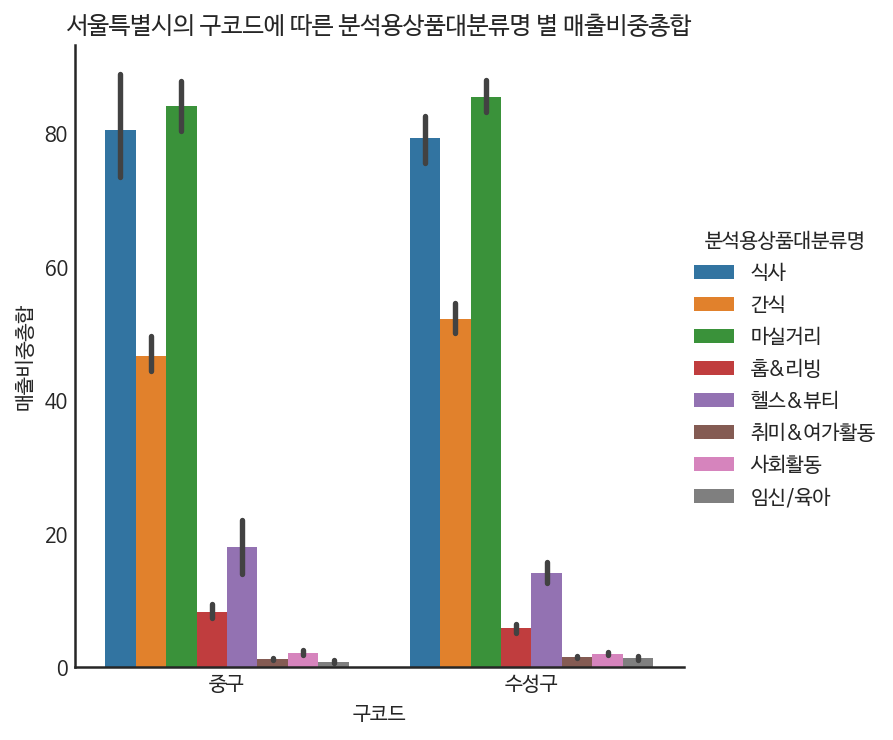

In [46]:
# 보고 싶은 값은 매출비중총합이라고 하자.
plt.figure(figsize = (12, 7))
plt.style.use("seaborn-white")
plt.rc('font', family='NanumBarunGothic') 

sns.catplot(x = '구코드',
            y = '매출비중총합',
            data = df5_seoul,
            hue = '분석용상품대분류명',
            kind = 'bar')

plt.title("서울특별시의 구코드에 따른 분석용상품대분류명 별 매출비중총합")
plt.show()

# 서울특별시 중구와 수성구에서는 각각 1. 마실거리, 2. 식사, 3.간식 4. 헬스,뷰티의 매출비중이 높았다.

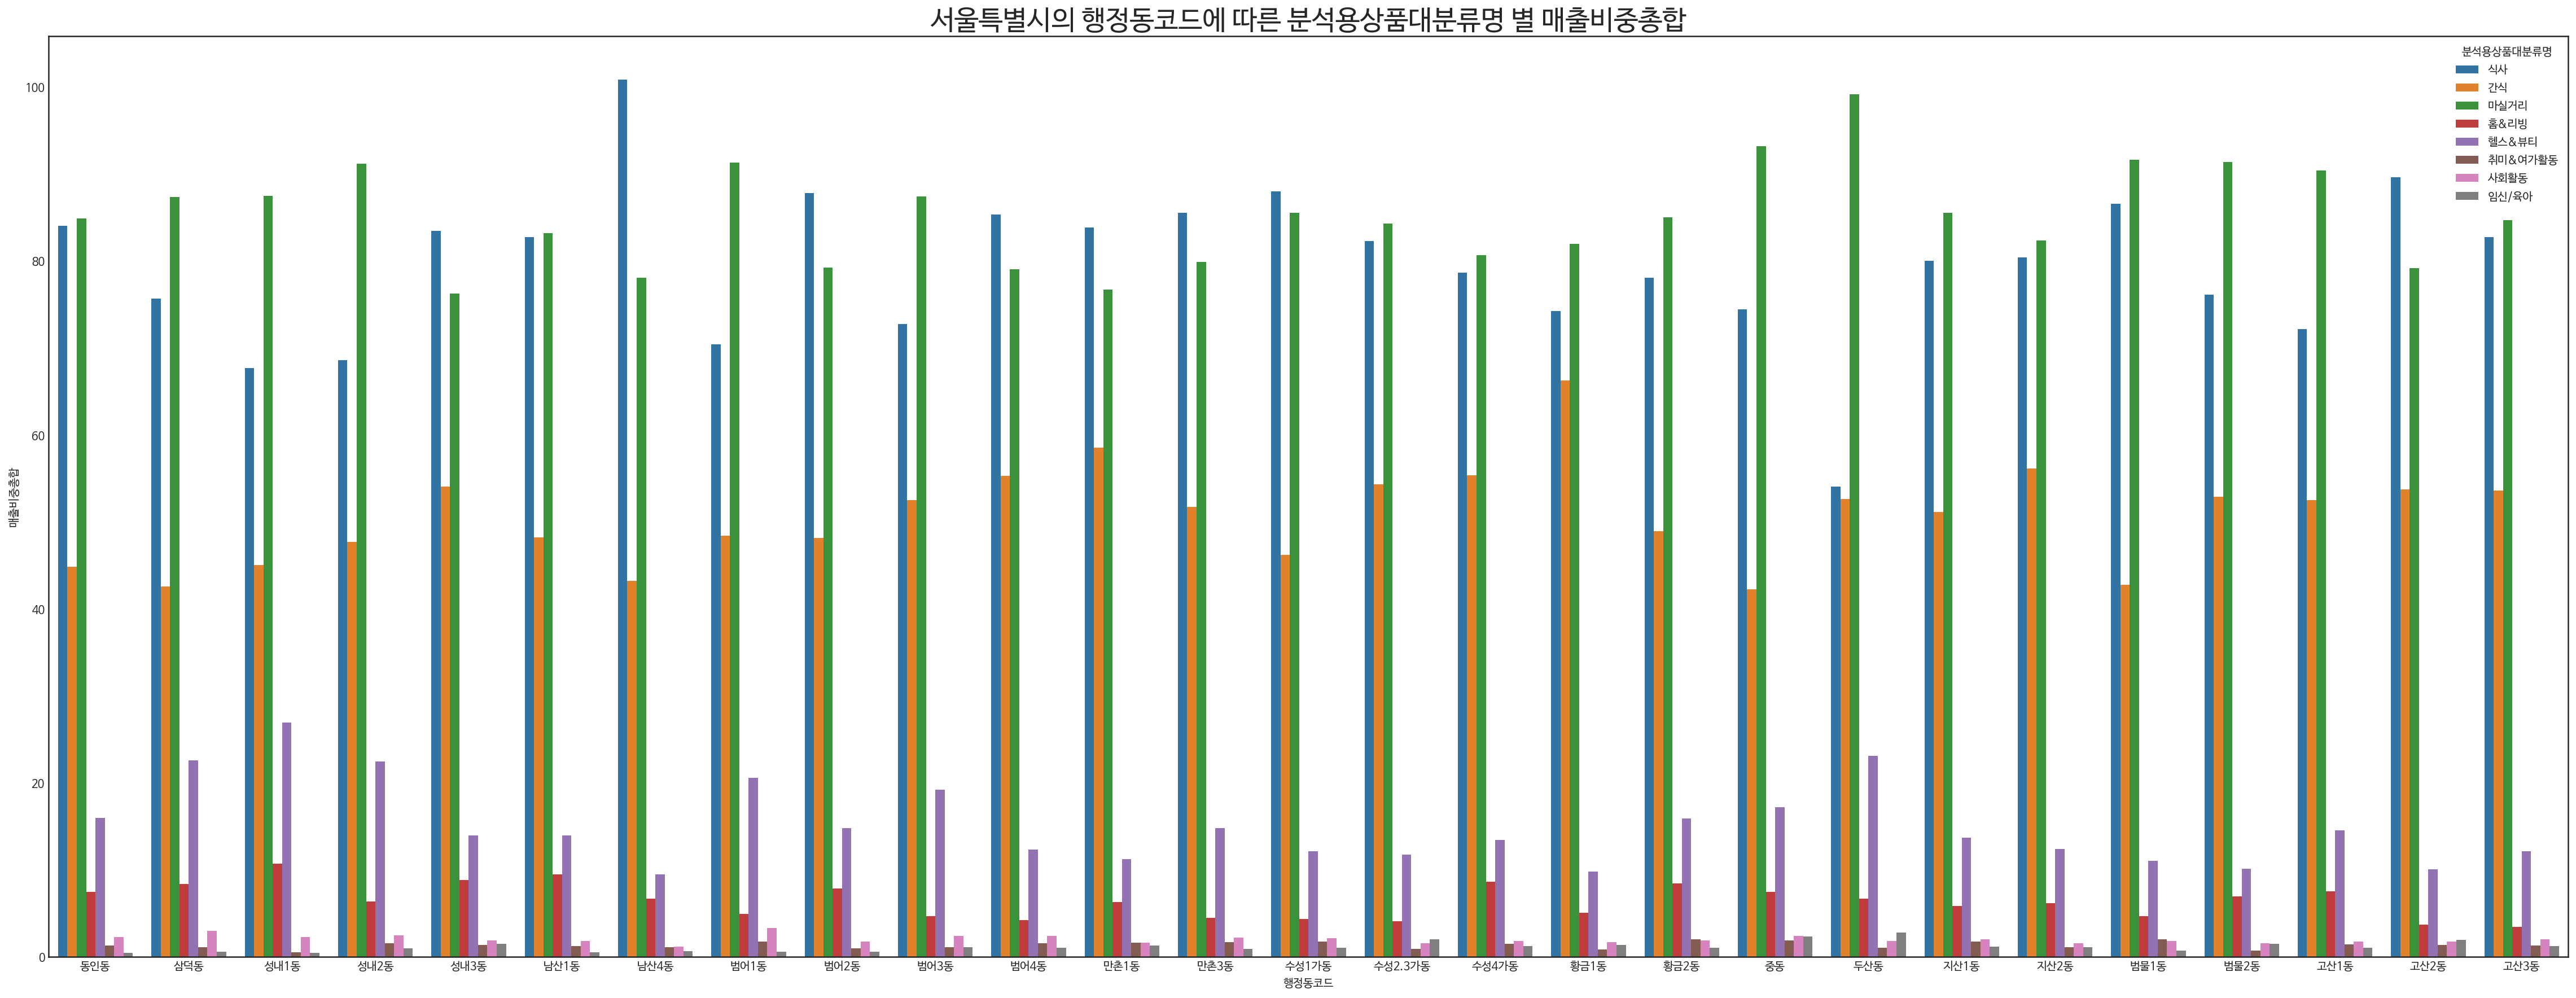

In [ ]:
# 보고 싶은 값은 매출비중총합이라고 하자.
plt.style.use("seaborn-white")
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize = (40, 15))
sns.barplot(x = '행정동코드',
            y = '매출비중총합',
            data = df5_seoul,
            hue = '분석용상품대분류명')

plt.title("서울특별시의 행정동코드에 따른 분석용상품대분류명 별 매출비중총합", fontsize = 24)
plt.show()

# 서울특별시 중구와 수성구내의 각 행정동에서도 매출비중의 분포는 유지됨을 알 수 있다.
# 각각 1. 마실거리, 2. 식사, 3.간식 4. 헬스,뷰티의 매출비중이 높았다.

<Figure size 864x504 with 0 Axes>

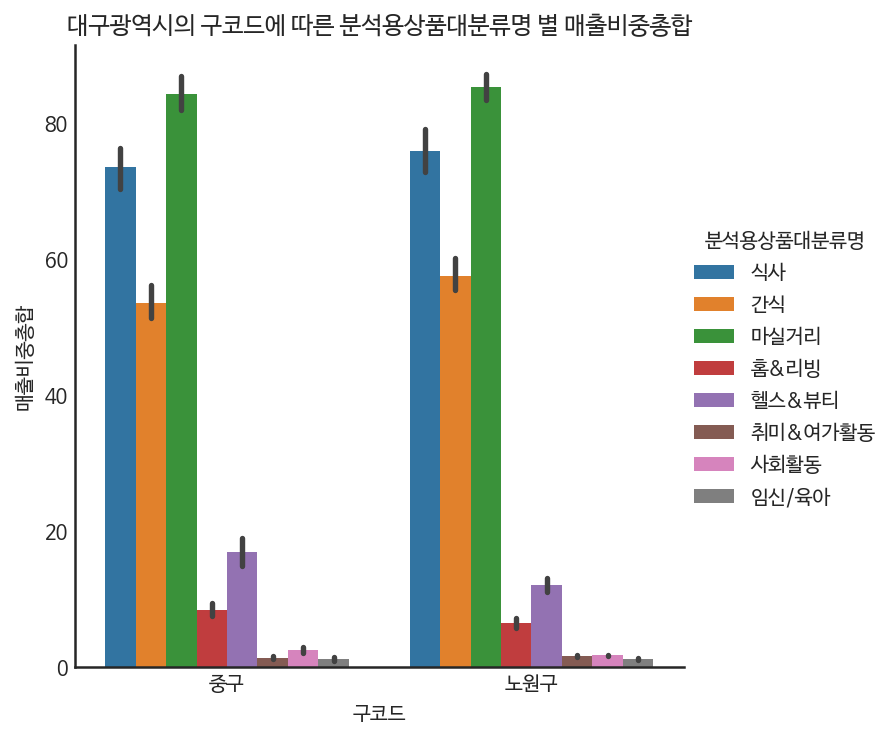

In [ ]:
# 이제 대구광역시에 대해 조사하자.
# 보고 싶은 값은 매출비중총합이라고 하자.
plt.figure(figsize = (12, 7))
plt.style.use("seaborn-white")
plt.rc('font', family='NanumBarunGothic') 

sns.catplot(x = '구코드',
            y = '매출비중총합',
            data = df5_daegu,
            hue = '분석용상품대분류명',
            kind = 'bar')

plt.title("대구광역시의 구코드에 따른 분석용상품대분류명 별 매출비중총합", fontsize = 12)
plt.show()

# 대구광역시 중구와 노원구에서는 각각 1. 마실거리, 2. 식사, 3.간식 4. 헬스,뷰티의 매출비중이 높았다.

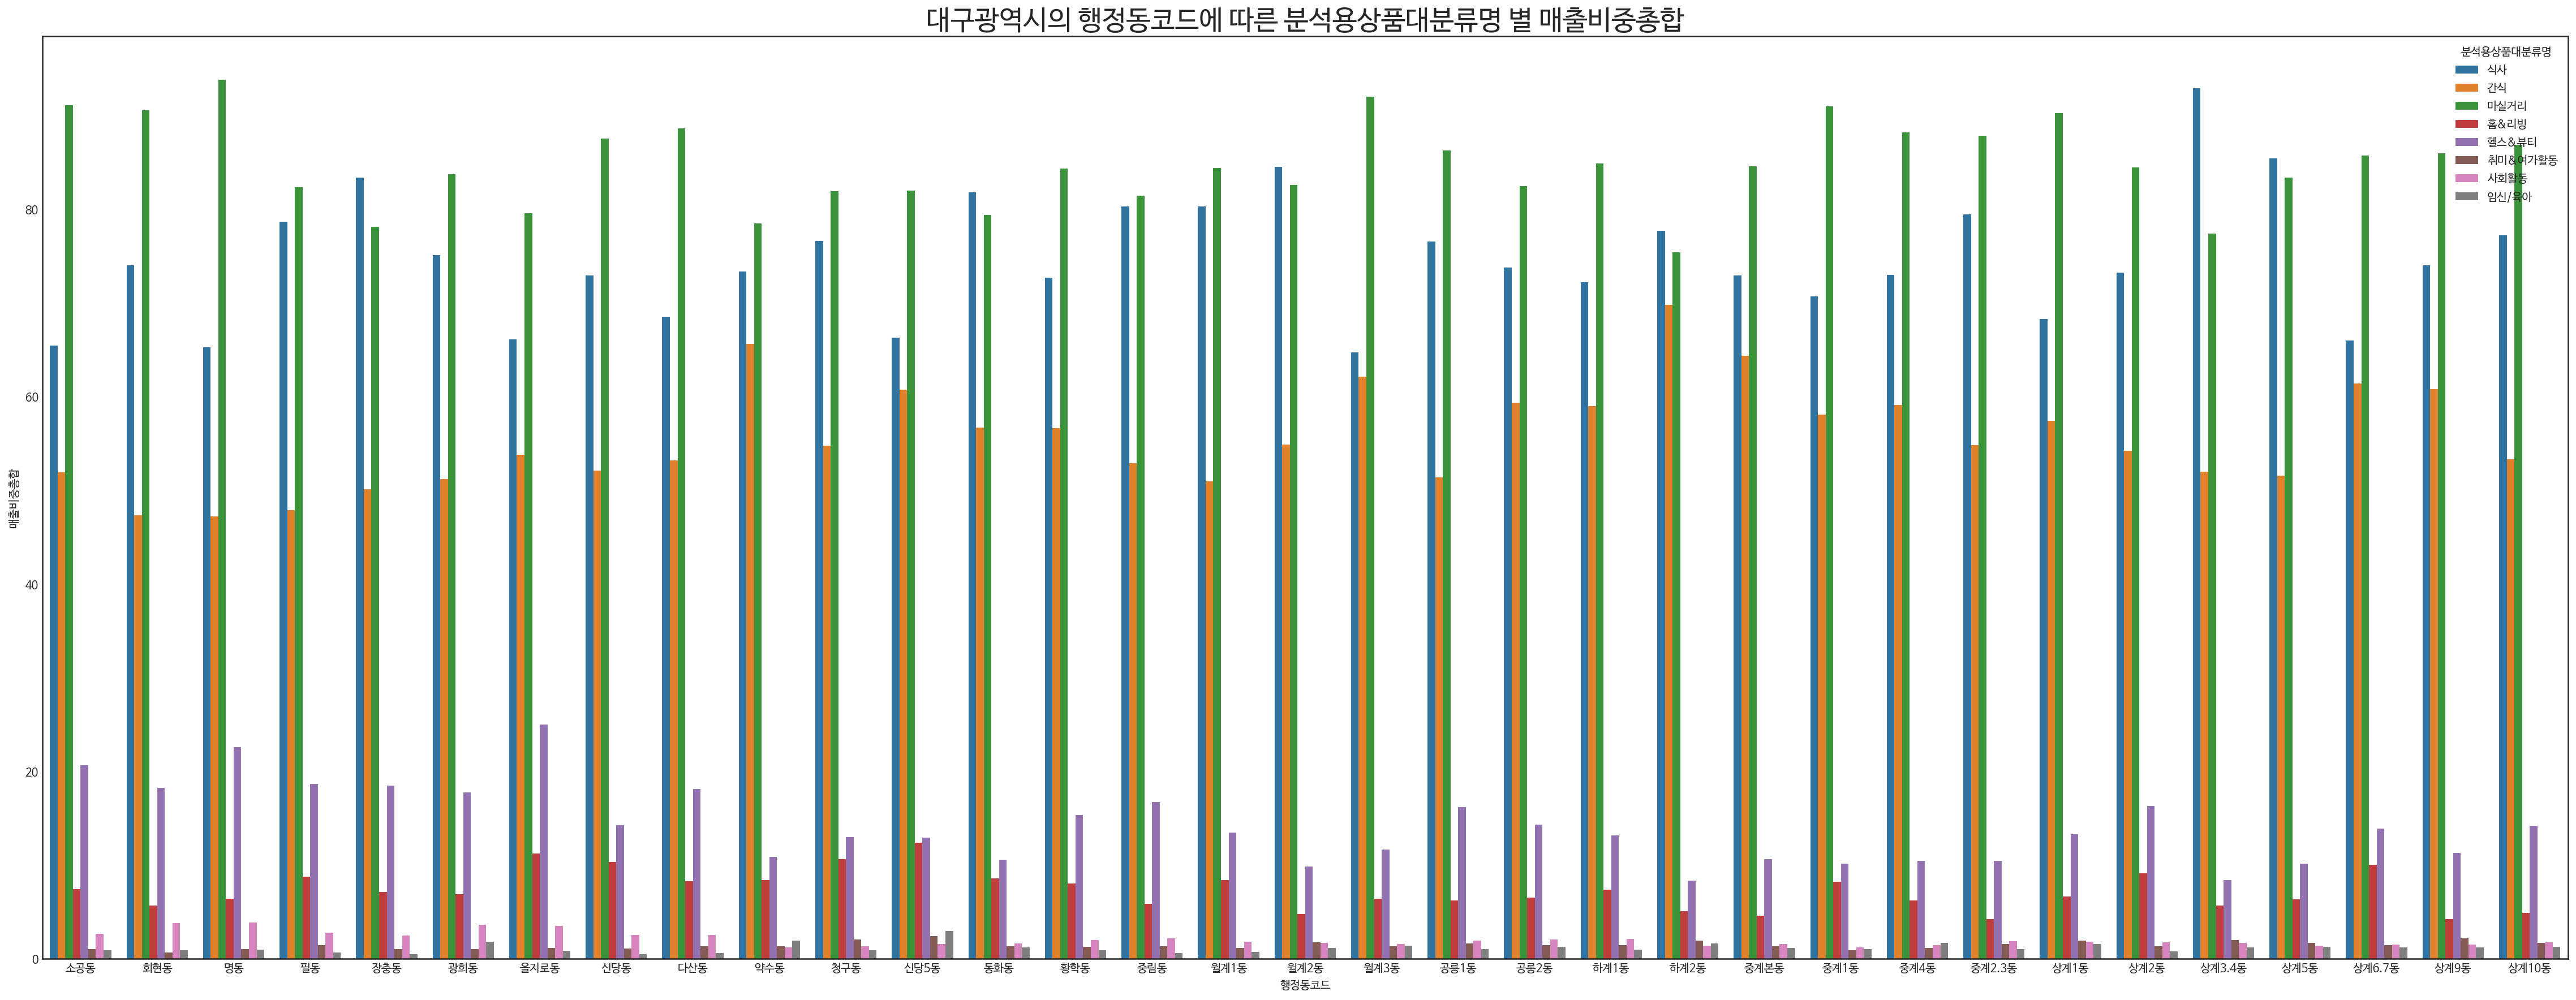

In [ ]:
# 보고 싶은 값은 매출비중총합이라고 하자.
plt.style.use("seaborn-white")
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize = (40, 15))
sns.barplot(x = '행정동코드',
            y = '매출비중총합',
            data = df5_daegu,
            hue = '분석용상품대분류명')

plt.title("대구광역시의 행정동코드에 따른 분석용상품대분류명 별 매출비중총합", fontsize = 24)
plt.show()
# 대구광역시에서도 매출지수의 분포는 유사하다.

In [ ]:
# 지금까지 각각, 서울특별시, 대구광역시로 한정하고
# 그 안에서 구코드별, 행정동단위별 상품분류별 매출지수를 살펴보았다.
# 이번에는 시간변화에 따른 매출지수의 변화를 각 상품분류대별로 알아보자! 지역은 통합하거나 시단위로 한다.
df5.head()

,시코드,구코드,행정동코드,분석용상품대분류코드,분석용상품대분류명,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301,20190302,20190303,20190304,20190305,20190306,20190307,...,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430,20200501,20200502,20200503,20200504,20200505,20200506,20200507,20200508,20200509,20200510,20200511,20200512,20200513,20200514,20200515,20200516,20200517,20200518,20200519,20200520,20200521,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531,매출비중총합
0,서울특별시,중구,소공동,10,식사,0.287643,0.304000,0.275632,0.355523,0.317881,0.330110,0.270279,0.270386,0.296560,0.331393,0.270114,0.266257,0.239292,0.164900,0.251561,0.268335,0.314781,0.282932,0.286122,0.260617,0.259070,0.257676,0.257555,0.289388,0.258523,0.263933,0.255477,0.235704,0.246036,0.270488,0.290425,0.250172,0.260892,0.260398,0.268952,...,0.282421,0.282932,0.263132,0.287572,0.286403,0.283980,0.242163,0.245888,0.230759,0.263034,0.258985,0.280020,0.280230,0.257263,0.263476,0.228352,0.294121,0.315224,0.277874,0.268401,0.258729,0.251273,0.297734,0.262807,0.302524,0.232195,0.295445,0.261349,0.251375,0.268470,0.243105,0.327853,0.299879,0.247657,0.265204,0.251100,0.239728,0.230298,0.324881,65.411531
1,서울특별시,중구,소공동,20,간식,0.185728,0.227291,0.225132,0.238465,0.269207,0.208921,0.192273,0.202527,0.230928,0.221312,0.202810,0.237103,0.303343,0.517748,0.222093,0.247292,0.223552,0.190817,0.188020,0.203030,0.196106,0.185722,0.226392,0.227288,0.192633,0.195803,0.184039,0.189513,0.213181,0.224242,0.219947,0.164338,0.173530,0.188965,0.201739,...,0.198790,0.199661,0.218128,0.212455,0.192229,0.190965,0.204839,0.231954,0.210047,0.233283,0.243951,0.185786,0.211516,0.179017,0.189067,0.163593,0.201344,0.216982,0.183395,0.190663,0.191550,0.197636,0.184178,0.225563,0.216429,0.146467,0.184448,0.203667,0.229587,0.195261,0.229224,0.181475,0.173981,0.177090,0.200248,0.195551,0.225265,0.213128,0.191642,51.879942
2,서울특별시,중구,소공동,30,마실거리,0.383557,0.344574,0.271592,0.308400,0.318957,0.335434,0.367804,0.396191,0.343452,0.332806,0.391645,0.388585,0.351793,0.245020,0.393664,0.351948,0.330399,0.403048,0.388255,0.397595,0.425623,0.416300,0.380141,0.356253,0.436517,0.408118,0.436939,0.401122,0.387255,0.365635,0.361646,0.402876,0.402858,0.409046,0.410611,...,0.402463,0.397833,0.374821,0.389110,0.405909,0.422539,0.418748,0.397385,0.416486,0.390463,0.399507,0.402053,0.394702,0.449712,0.440604,0.372415,0.347029,0.359377,0.410485,0.409154,0.427106,0.424746,0.384037,0.348575,0.382579,0.329100,0.366716,0.427732,0.415023,0.394646,0.401531,0.354308,0.411805,0.378491,0.429040,0.421532,0.430289,0.430194,0.374880,91.100371
3,서울특별시,중구,소공동,40,홈&리빙,0.041739,0.028022,0.017387,0.015014,0.015643,0.036311,0.040480,0.030862,0.018472,0.024463,0.047204,0.030546,0.029681,0.019630,0.024013,0.021701,0.029760,0.032784,0.017793,0.057698,0.029279,0.043477,0.033853,0.025336,0.025892,0.044954,0.038406,0.078220,0.036033,0.023917,0.034357,0.059875,0.043031,0.025829,0.028016,...,0.042177,0.040155,0.051452,0.017678,0.028066,0.025908,0.038869,0.022801,0.031582,0.020930,0.026069,0.039285,0.032891,0.025460,0.028391,0.073872,0.016335,0.031176,0.022639,0.049739,0.038742,0.030560,0.023929,0.036092,0.028559,0.030327,0.029768,0.023469,0.019519,0.035964,0.027361,0.027054,0.037556,0.046373,0.025700,0.043245,0.026604,0.042435,0.019790,7.407588
4,서울특별시,중구,소공동,50,헬스&뷰티,0.081483,0.084229,0.187566,0.057285,0.061882,0.069243,0.106055,0.084363,0.076881,0.066559,0.071118,0.061782,0.057186,0.041791,0.090194,0.081128,0.076905,0.070195,0.100265,0.061808,0.069241,0.078936,0.074406,0.076179,0.071018,0.067141,0.070487,0.079692,0.082380,0.094799,0.074534,0.103827,0.099271,0.096589,0.070254,...,0.062315,0.064791,0.071600,0.079849,0.076812,0.068383,0.075994,0.087082,0.087912,0.075940,0.065198,0.071203,0.059295,0.074016,0.066784,0.

In [ ]:
# 서울특별시 데이터
df5_seoul.head()

,시코드,구코드,행정동코드,분석용상품대분류코드,분석용상품대분류명,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301,20190302,20190303,20190304,20190305,20190306,20190307,...,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430,20200501,20200502,20200503,20200504,20200505,20200506,20200507,20200508,20200509,20200510,20200511,20200512,20200513,20200514,20200515,20200516,20200517,20200518,20200519,20200520,20200521,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531,매출비중총합
264,대구광역시,중구,동인동,10,식사,0.374669,0.375773,0.371671,0.339908,0.314365,0.369355,0.374059,0.385601,0.382680,0.409741,0.388950,0.377971,0.348919,0.285340,0.422342,0.387144,0.400600,0.383877,0.399797,0.420941,0.386765,0.383908,0.363655,0.387591,0.378101,0.381469,0.382581,0.365612,0.349425,0.342673,0.382863,0.372138,0.379427,0.376421,0.364011,...,0.380045,0.301796,0.267022,0.312809,0.339377,0.324535,0.311024,0.300853,0.272503,0.265213,0.332317,0.292686,0.326942,0.328381,0.319935,0.290524,0.335348,0.319527,0.314367,0.342338,0.317880,0.322107,0.350546,0.293916,0.304081,0.296850,0.348631,0.344118,0.327548,0.334010,0.257183,0.302866,0.271882,0.317087,0.320742,0.357626,0.295569,0.280340,0.309401,84.020202
265,대구광역시,중구,동인동,20,간식,0.167776,0.178533,0.191840,0.175530,0.196849,0.161931,0.153964,0.192211,0.186946,0.195048,0.195187,0.212669,0.270036,0.414785,0.158462,0.181601,0.182093,0.164219,0.168023,0.170315,0.176973,0.159219,0.178987,0.191806,0.173511,0.167412,0.162120,0.154430,0.193094,0.197931,0.196143,0.197529,0.173883,0.165173,0.189745,...,0.162224,0.162732,0.182784,0.202736,0.159710,0.185587,0.164573,0.193013,0.175690,0.191712,0.191370,0.173225,0.193003,0.157176,0.175453,0.166848,0.206762,0.191687,0.138510,0.154916,0.181157,0.158394,0.181096,0.185696,0.189235,0.177522,0.155203,0.180607,0.181934,0.183966,0.185177,0.211768,0.208155,0.162106,0.167557,0.139568,0.182570,0.190321,0.189664,44.807402
266,대구광역시,중구,동인동,30,마실거리,0.328150,0.334630,0.319824,0.338906,0.377593,0.354844,0.341593,0.336805,0.318259,0.292804,0.295570,0.318832,0.305506,0.233666,0.305771,0.319619,0.328957,0.344284,0.316179,0.322134,0.339481,0.329102,0.350700,0.332879,0.336020,0.346592,0.346398,0.363748,0.338540,0.338833,0.327437,0.328018,0.339559,0.327296,0.352565,...,0.378598,0.423341,0.415863,0.402080,0.381270,0.409715,0.419228,0.389053,0.426880,0.445510,0.349625,0.440209,0.339809,0.382086,0.406270,0.424343,0.371731,0.383898,0.441496,0.379433,0.400798,0.425064,0.356284,0.372162,0.408485,0.390864,0.348791,0.372443,0.367430,0.399183,0.417983,0.391459,0.418946,0.389450,0.403745,0.408107,0.429204,0.395429,0.391886,84.875473
267,대구광역시,중구,동인동,40,홈&리빙,0.061699,0.022182,0.017218,0.028339,0.031693,0.023927,0.048266,0.016138,0.027782,0.023665,0.064648,0.026695,0.026314,0.019709,0.039949,0.030055,0.026131,0.021367,0.012133,0.018226,0.016278,0.042985,0.022886,0.019434,0.038383,0.025228,0.019960,0.046357,0.022626,0.024660,0.015872,0.015227,0.038081,0.011781,0.026061,...,0.016019,0.034115,0.044733,0.022905,0.052625,0.022800,0.026081,0.047853,0.030228,0.031400,0.021916,0.034655,0.042196,0.043257,0.031448,0.032352,0.021798,0.027050,0.030554,0.037731,0.049004,0.031087,0.027752,0.053947,0.019273,0.026955,0.050325,0.033614,0.044372,0.016151,0.047401,0.025750,0.040949,0.073034,0.038041,0.020055,0.020875,0.035692,0.046411,7.457962
268,대구광역시,중구,동인동,50,헬스&뷰티,0.063856,0.077709,0.089299,0.070022,0.064366,0.059613,0.044093,0.049656,0.066092,0.063986,0.043835,0.043531,0.034590,0.035990,0.054327,0.064845,0.056590,0.068612,0.098322,0.046973,0.063952,0.070371,0.067768,0.041930,0.062984,0.053342,0.073380,0.054501,0.075818,0.072234,0.061965,0.065755,0.057364,0.107917,0.053053,...,0.047286,0.063032,0.070342,0.042862,0.051110,0.048473,0.054508,0.053203,0.077404,0.062829,0.076970,0.048836,0.090042,0.055512,0

In [ ]:
# 대구광역시 데이터
df5_daegu.head()

,시코드,구코드,행정동코드,분석용상품대분류코드,분석용상품대분류명,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301,20190302,20190303,20190304,20190305,20190306,20190307,...,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430,20200501,20200502,20200503,20200504,20200505,20200506,20200507,20200508,20200509,20200510,20200511,20200512,20200513,20200514,20200515,20200516,20200517,20200518,20200519,20200520,20200521,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531,매출비중총합
0,서울특별시,중구,소공동,10,식사,0.287643,0.304000,0.275632,0.355523,0.317881,0.330110,0.270279,0.270386,0.296560,0.331393,0.270114,0.266257,0.239292,0.164900,0.251561,0.268335,0.314781,0.282932,0.286122,0.260617,0.259070,0.257676,0.257555,0.289388,0.258523,0.263933,0.255477,0.235704,0.246036,0.270488,0.290425,0.250172,0.260892,0.260398,0.268952,...,0.282421,0.282932,0.263132,0.287572,0.286403,0.283980,0.242163,0.245888,0.230759,0.263034,0.258985,0.280020,0.280230,0.257263,0.263476,0.228352,0.294121,0.315224,0.277874,0.268401,0.258729,0.251273,0.297734,0.262807,0.302524,0.232195,0.295445,0.261349,0.251375,0.268470,0.243105,0.327853,0.299879,0.247657,0.265204,0.251100,0.239728,0.230298,0.324881,65.411531
1,서울특별시,중구,소공동,20,간식,0.185728,0.227291,0.225132,0.238465,0.269207,0.208921,0.192273,0.202527,0.230928,0.221312,0.202810,0.237103,0.303343,0.517748,0.222093,0.247292,0.223552,0.190817,0.188020,0.203030,0.196106,0.185722,0.226392,0.227288,0.192633,0.195803,0.184039,0.189513,0.213181,0.224242,0.219947,0.164338,0.173530,0.188965,0.201739,...,0.198790,0.199661,0.218128,0.212455,0.192229,0.190965,0.204839,0.231954,0.210047,0.233283,0.243951,0.185786,0.211516,0.179017,0.189067,0.163593,0.201344,0.216982,0.183395,0.190663,0.191550,0.197636,0.184178,0.225563,0.216429,0.146467,0.184448,0.203667,0.229587,0.195261,0.229224,0.181475,0.173981,0.177090,0.200248,0.195551,0.225265,0.213128,0.191642,51.879942
2,서울특별시,중구,소공동,30,마실거리,0.383557,0.344574,0.271592,0.308400,0.318957,0.335434,0.367804,0.396191,0.343452,0.332806,0.391645,0.388585,0.351793,0.245020,0.393664,0.351948,0.330399,0.403048,0.388255,0.397595,0.425623,0.416300,0.380141,0.356253,0.436517,0.408118,0.436939,0.401122,0.387255,0.365635,0.361646,0.402876,0.402858,0.409046,0.410611,...,0.402463,0.397833,0.374821,0.389110,0.405909,0.422539,0.418748,0.397385,0.416486,0.390463,0.399507,0.402053,0.394702,0.449712,0.440604,0.372415,0.347029,0.359377,0.410485,0.409154,0.427106,0.424746,0.384037,0.348575,0.382579,0.329100,0.366716,0.427732,0.415023,0.394646,0.401531,0.354308,0.411805,0.378491,0.429040,0.421532,0.430289,0.430194,0.374880,91.100371
3,서울특별시,중구,소공동,40,홈&리빙,0.041739,0.028022,0.017387,0.015014,0.015643,0.036311,0.040480,0.030862,0.018472,0.024463,0.047204,0.030546,0.029681,0.019630,0.024013,0.021701,0.029760,0.032784,0.017793,0.057698,0.029279,0.043477,0.033853,0.025336,0.025892,0.044954,0.038406,0.078220,0.036033,0.023917,0.034357,0.059875,0.043031,0.025829,0.028016,...,0.042177,0.040155,0.051452,0.017678,0.028066,0.025908,0.038869,0.022801,0.031582,0.020930,0.026069,0.039285,0.032891,0.025460,0.028391,0.073872,0.016335,0.031176,0.022639,0.049739,0.038742,0.030560,0.023929,0.036092,0.028559,0.030327,0.029768,0.023469,0.019519,0.035964,0.027361,0.027054,0.037556,0.046373,0.025700,0.043245,0.026604,0.042435,0.019790,7.407588
4,서울특별시,중구,소공동,50,헬스&뷰티,0.081483,0.084229,0.187566,0.057285,0.061882,0.069243,0.106055,0.084363,0.076881,0.066559,0.071118,0.061782,0.057186,0.041791,0.090194,0.081128,0.076905,0.070195,0.100265,0.061808,0.069241,0.078936,0.074406,0.076179,0.071018,0.067141,0.070487,0.079692,0.082380,0.094799,0.074534,0.103827,0.099271,0.096589,0.070254,...,0.062315,0.064791,0.071600,0.079849,0.076812,0.068383,0.075994,0.087082,0.087912,0.075940,0.065198,0.071203,0.059295,0.074016,0.066784,0.

### 분석데이터 df6 데이터 읽기

In [47]:
df6 = pd.read_excel('04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx',
                       sheet_name = '종합테이블(TB_DD_STR_PURCH_CLS)')
df6.head()
# 각 도시/구/동/매출지수/각 소비부문8개 지수비중
# 데이터 전처리 끝! 여기부터 시작!

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,20190201,대구광역시,수성구,고산1동,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637
1,20190201,대구광역시,수성구,고산2동,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913
2,20190201,대구광역시,수성구,고산3동,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697
3,20190201,대구광역시,수성구,두산동,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000
4,20190201,대구광역시,수성구,만촌1동,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719


In [48]:
# 컬럼 확인
for i in df6.columns:
    print(i)

OPER_DT
PVN
BOR
ADMD
AMT_IND
LCLS_10_P
LCLS_20_P
LCLS_30_P
LCLS_40_P
LCLS_50_P
LCLS_60_P
LCLS_70_P
LCLS_80_P


In [49]:
# 의미를 파악하기 쉽게 한국어 컬럼으로 바꿔준다.
df6.rename(columns = 
        {'OPER_DT': '영업일자',
        'PVN': '시코드',
        'BOR': '구코드',
        'ADMD': '행정동코드',
        'AMT_IND': '매출지수',
        'LCLS_10_P': '식사_비중',
        'LCLS_20_P': '간식_비중',
        'LCLS_30_P': '마실거리_비중',
        'LCLS_40_P': '홈&리빙_비중',
        'LCLS_50_P': '헬스&뷰티_비중',
        'LCLS_60_P': '취미&여가활동_비중',
        'LCLS_70_P': '사회활동_비중',
        'LCLS_80_P': '임신/육아_비중',
        'LCLS_90_P': '기호품_비중'}, inplace = True)

df6.head()

,영업일자,시코드,구코드,행정동코드,매출지수,식사_비중,간식_비중,마실거리_비중,홈&리빙_비중,헬스&뷰티_비중,취미&여가활동_비중,사회활동_비중,임신/육아_비중
0,20190201,대구광역시,수성구,고산1동,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637
1,20190201,대구광역시,수성구,고산2동,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913
2,20190201,대구광역시,수성구,고산3동,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697
3,20190201,대구광역시,수성구,두산동,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000
4,20190201,대구광역시,수성구,만촌1동,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719


In [50]:
# 전체 비중합 컬럼을 생성한다.
df6['비중합'] = df6['식사_비중'] + df6['간식_비중'] + df6['마실거리_비중'] + df6['홈&리빙_비중'] + df6['헬스&뷰티_비중'] + df6['취미&여가활동_비중'] + df6['사회활동_비중'] + df6['임신/육아_비중']

In [51]:
df6.head() # 비중합은 항상 1.0으로 고정된다.

,영업일자,시코드,구코드,행정동코드,매출지수,식사_비중,간식_비중,마실거리_비중,홈&리빙_비중,헬스&뷰티_비중,취미&여가활동_비중,사회활동_비중,임신/육아_비중,비중합
0,20190201,대구광역시,수성구,고산1동,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637,1.0
1,20190201,대구광역시,수성구,고산2동,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913,1.0
2,20190201,대구광역시,수성구,고산3동,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697,1.0
3,20190201,대구광역시,수성구,두산동,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000,1.0
4,20190201,대구광역시,수성구,만촌1동,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719,1.0


In [52]:
# 영업일자는 일단위(day)까지 기록되어 있으므로 다소 난잡하다.
# 월단위까지로 전환한다.
year_month = []

for i in df6['영업일자']:
    if type(i) == int:
        i = str(i)
        year_month.append(i[:6])
    else:
        print("There`s another type")

In [53]:
df6['영업일자'] = year_month # 컬럼 재정의

In [54]:
df6.head()

,영업일자,시코드,구코드,행정동코드,매출지수,식사_비중,간식_비중,마실거리_비중,홈&리빙_비중,헬스&뷰티_비중,취미&여가활동_비중,사회활동_비중,임신/육아_비중,비중합
0,201902,대구광역시,수성구,고산1동,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637,1.0
1,201902,대구광역시,수성구,고산2동,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913,1.0
2,201902,대구광역시,수성구,고산3동,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697,1.0
3,201902,대구광역시,수성구,두산동,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000,1.0
4,201902,대구광역시,수성구,만촌1동,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719,1.0


In [55]:
# 다시 서울특별시, 대구광역시로 한정하여 데이터프레임을 나눠준다.
df6_seoul = df6[df6['시코드'] == '서울특별시']
df6_daegu = df6[df6['시코드'] == '대구광역시']


<Figure size 2160x720 with 0 Axes>

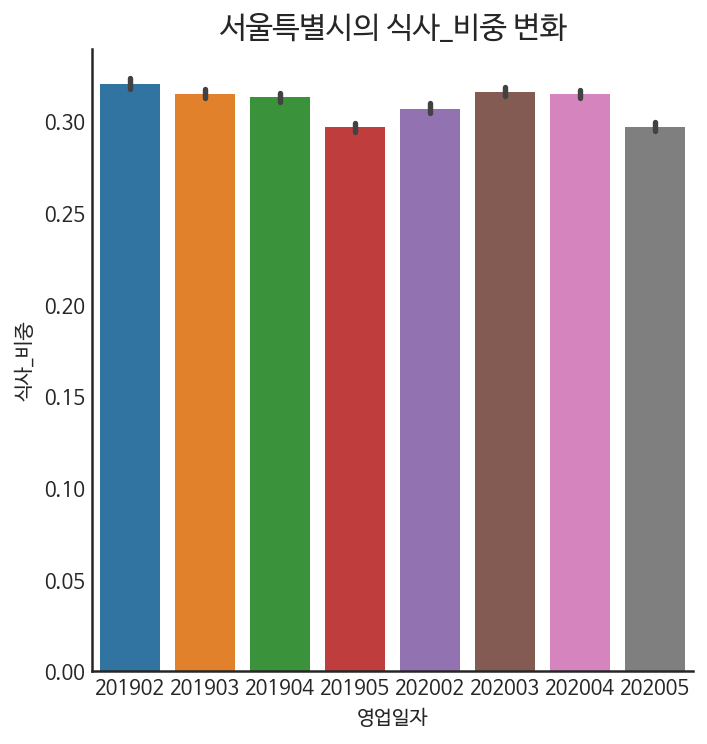

<Figure size 2160x720 with 0 Axes>

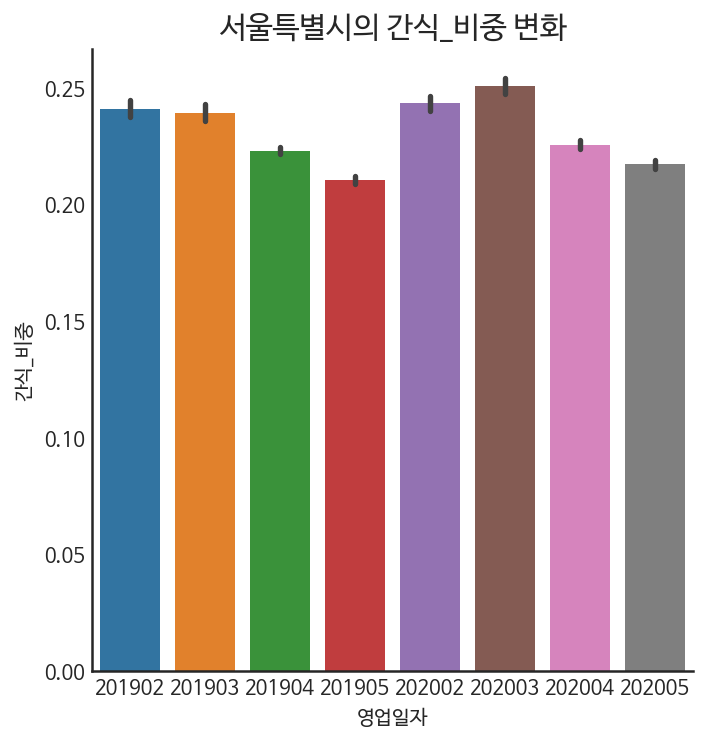

<Figure size 2160x720 with 0 Axes>

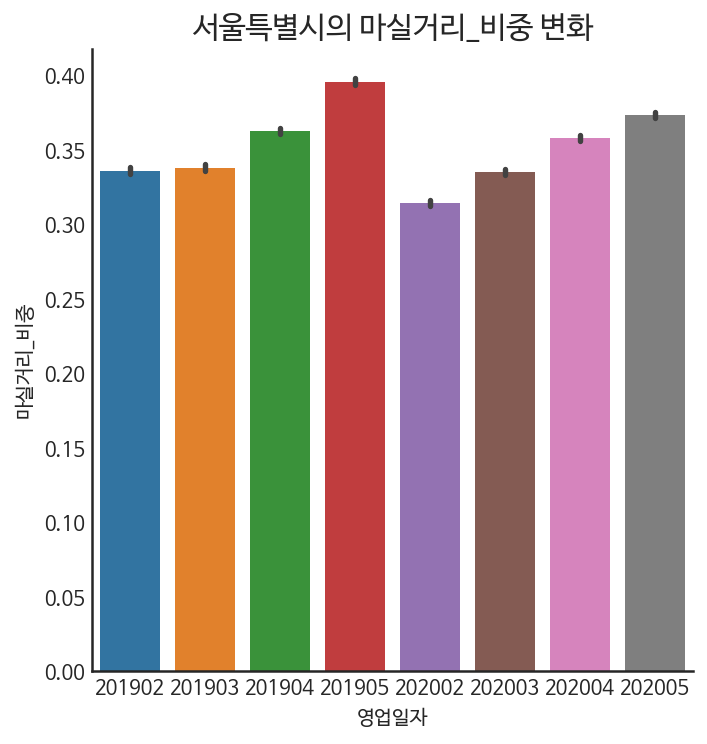

<Figure size 2160x720 with 0 Axes>

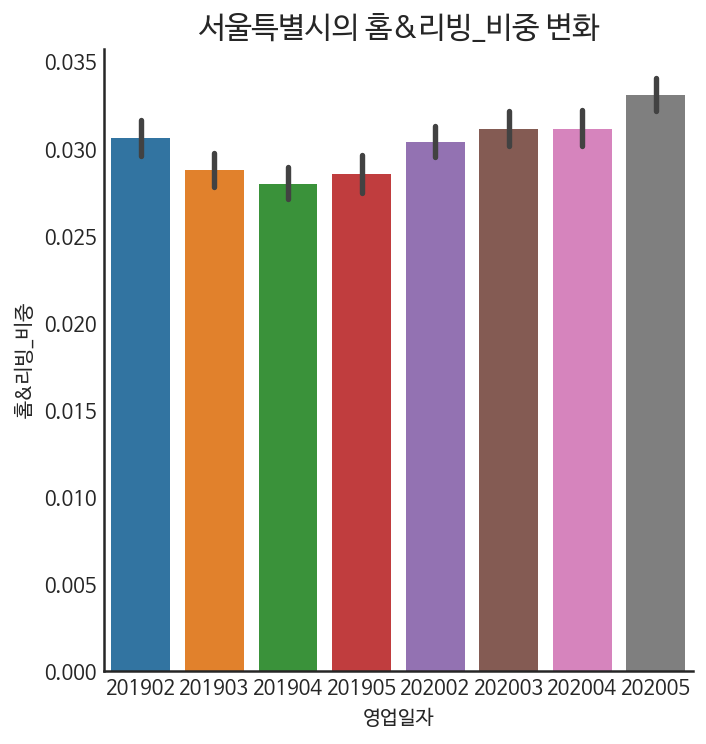

<Figure size 2160x720 with 0 Axes>

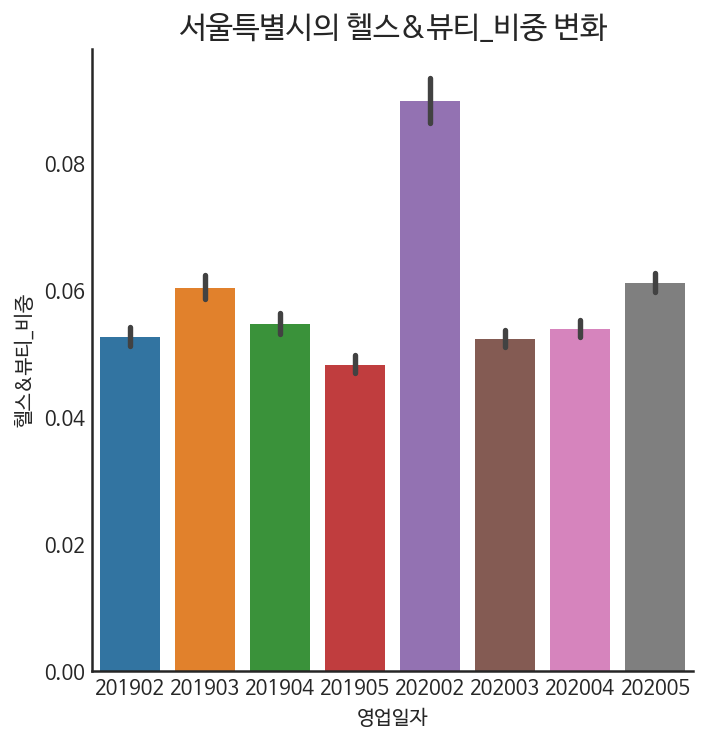

<Figure size 2160x720 with 0 Axes>

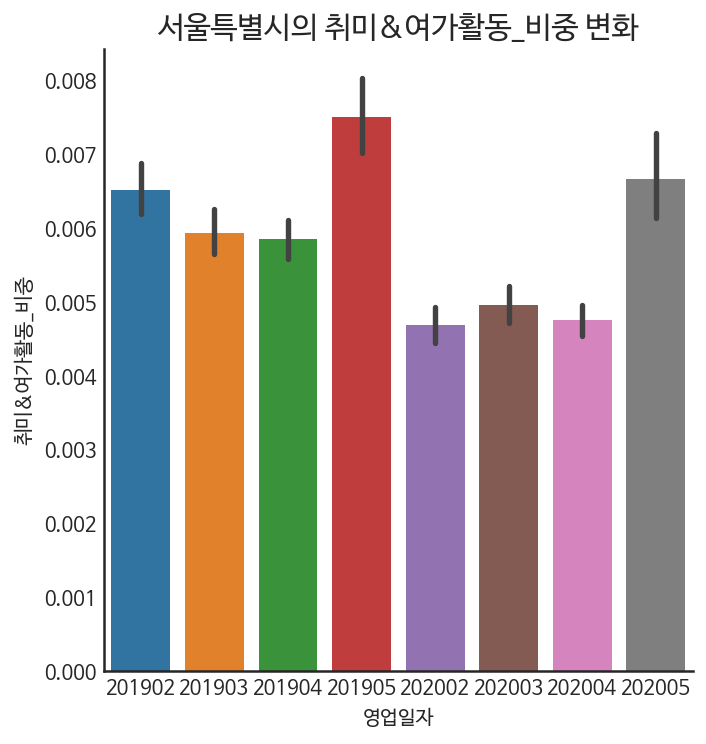

<Figure size 2160x720 with 0 Axes>

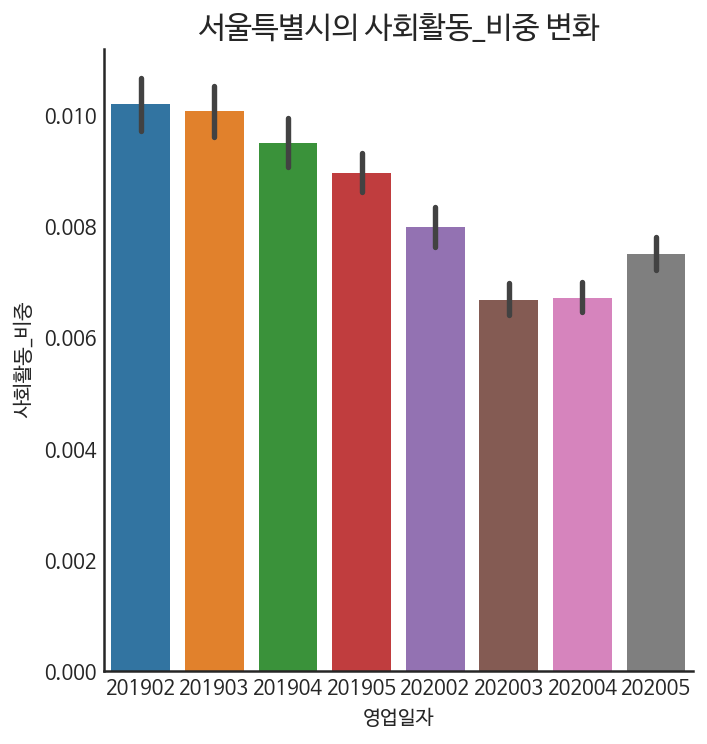

<Figure size 2160x720 with 0 Axes>

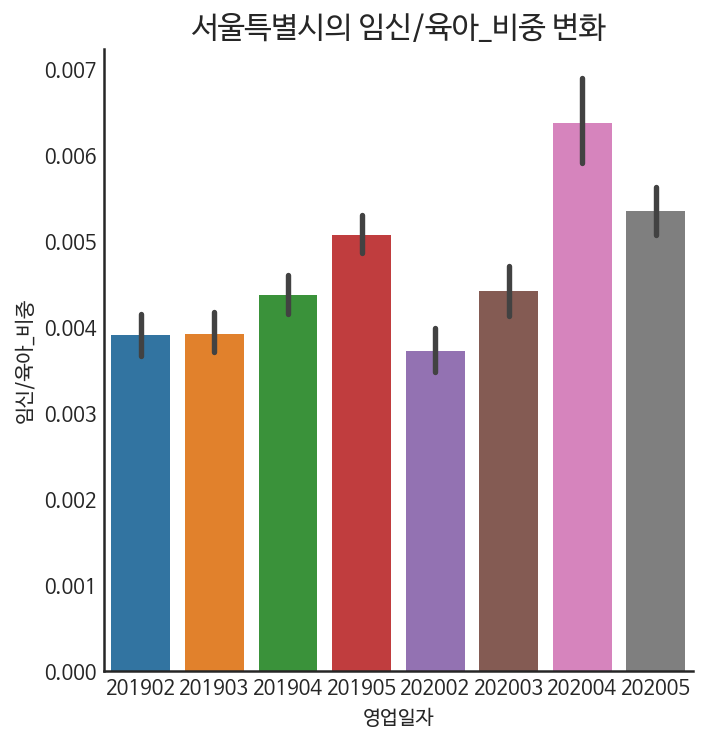

In [56]:
# 시간정보(영업일자)에 따른 공간정보(시단위, 구단위, 행정동단위)에 따른 매출 지수값이 존재하고, 이에 대한 비중값이 존재하며 모든 비중의 합은 1.0으로 통합된다.
# 참고로 비중합은 항상 1.0이므로 의미없다.
# 보고 싶은 값은 매출지수이다.

plt.style.use("seaborn-white")
plt.rc('font', family='NanumBarunGothic') 

for i in ['식사_비중','간식_비중','마실거리_비중','홈&리빙_비중','헬스&뷰티_비중','취미&여가활동_비중','사회활동_비중','임신/육아_비중']:

    plt.figure(figsize = (30, 10))
    sns.catplot(x = '영업일자',
                y = i,
                data = df6_seoul,
                kind = 'bar')

    plt.title("서울특별시의 " + i + " 변화", fontsize = 15)
    plt.show()

# 다음은 2019년 2~5월, 2020년 2~5월에서의 식사, 간식, 마실거리, 홈&리빙, 헬스&뷰티, 취미&여가활동, 사회활동, 임신/육아 비중의 변화이다.
# 2020년 2월은 코로나의 사회적영향력이 확대인 시기임을 감안하면, 

<Figure size 2160x720 with 0 Axes>

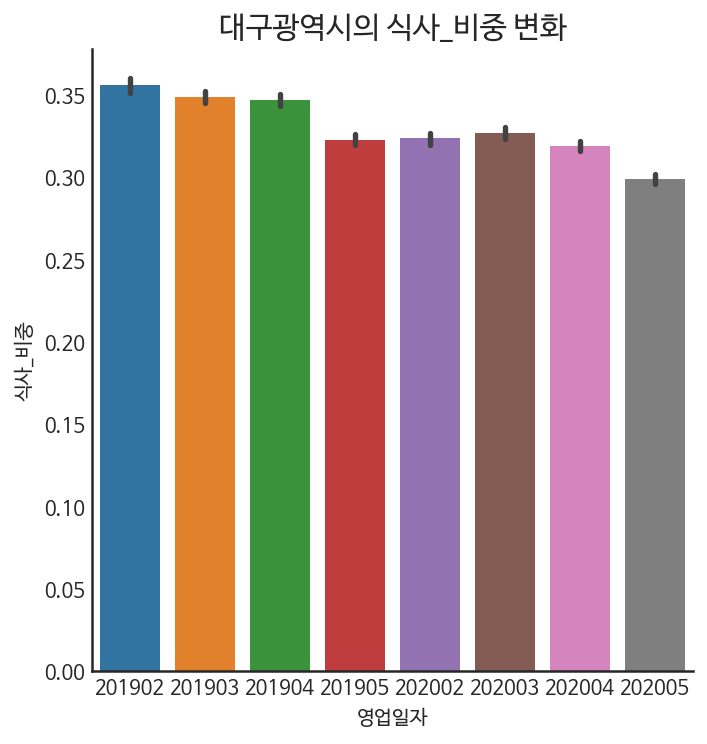

<Figure size 2160x720 with 0 Axes>

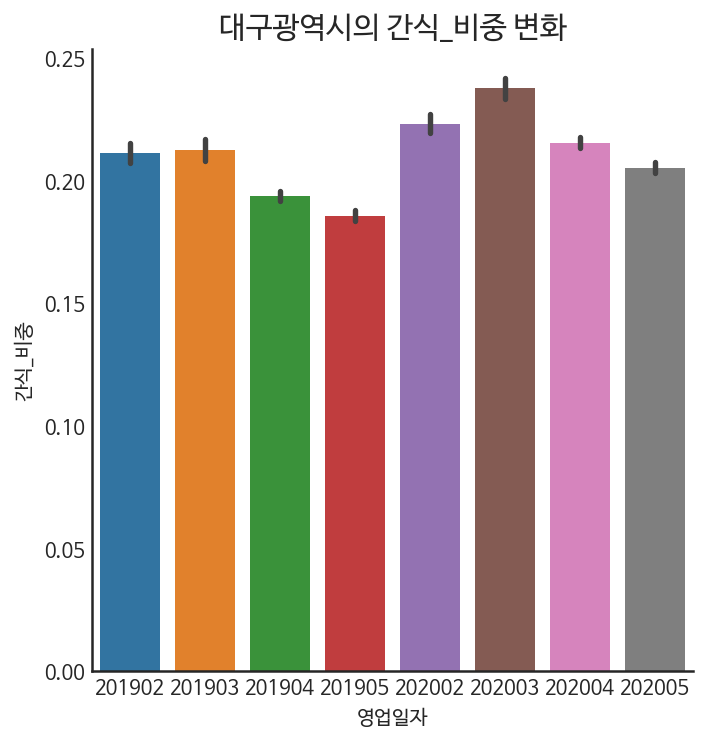

<Figure size 2160x720 with 0 Axes>

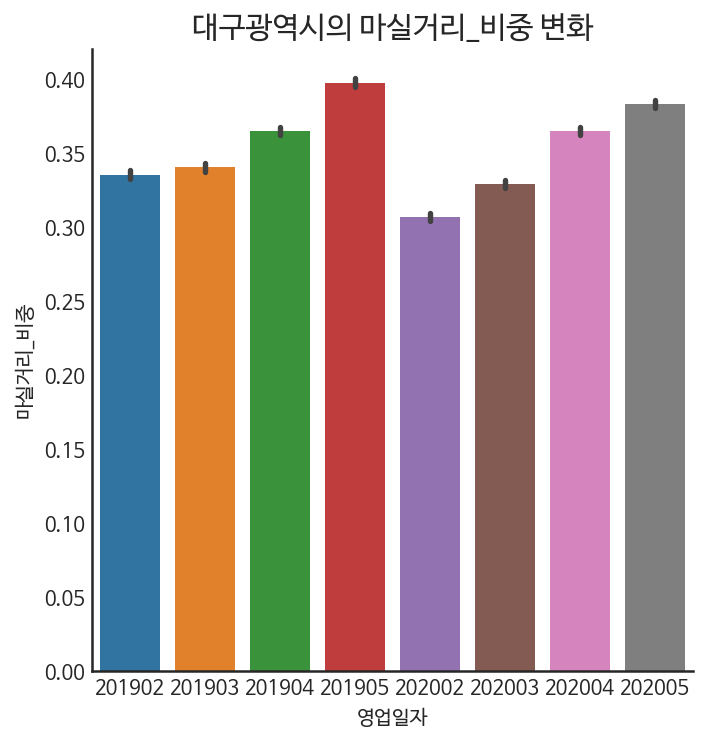

<Figure size 2160x720 with 0 Axes>

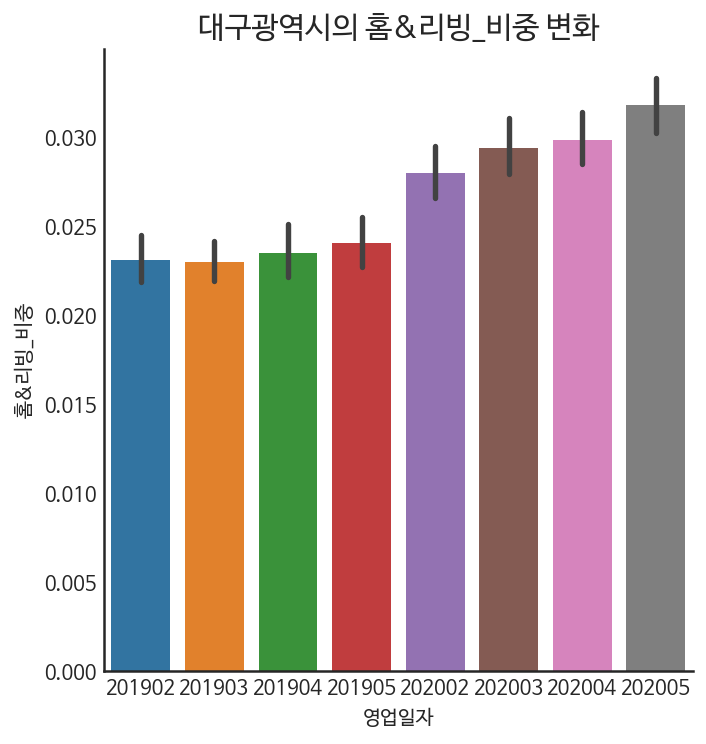

<Figure size 2160x720 with 0 Axes>

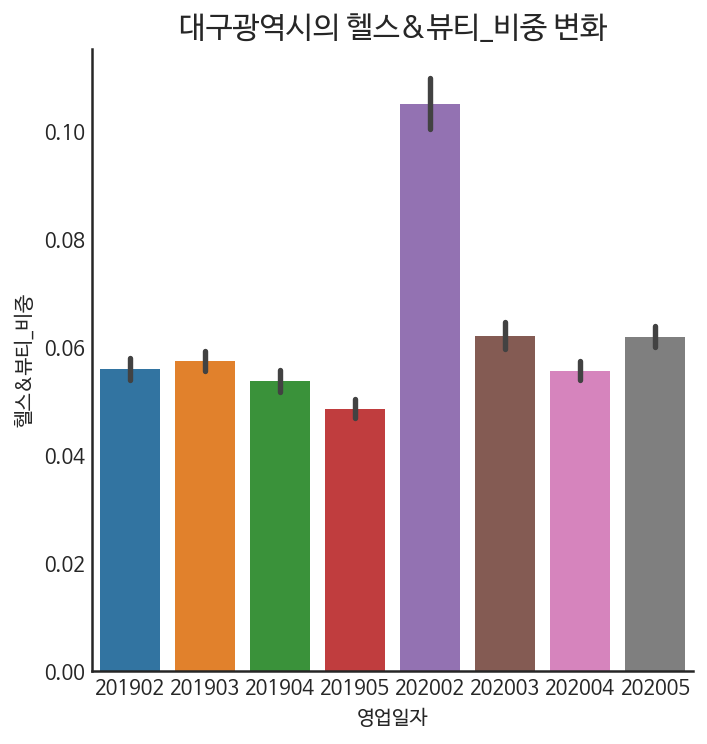

<Figure size 2160x720 with 0 Axes>

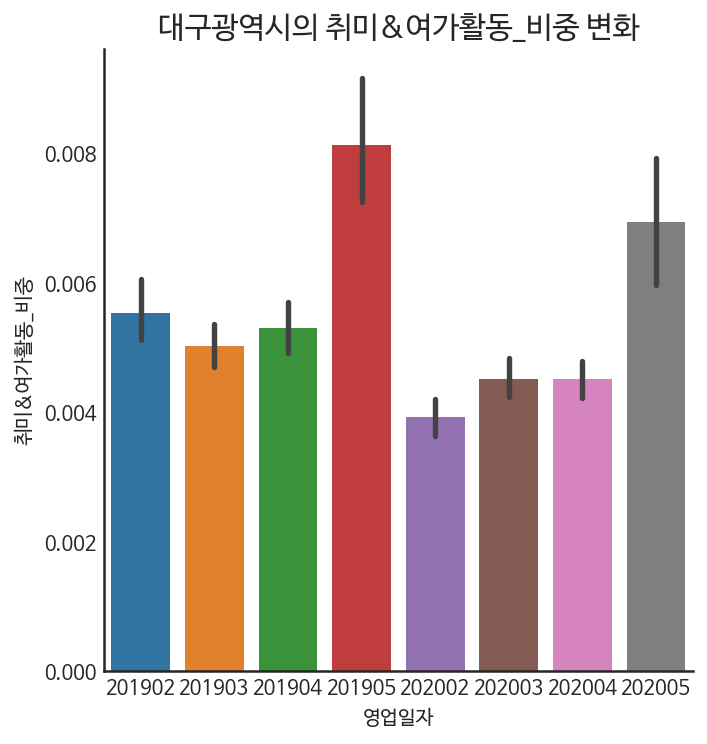

<Figure size 2160x720 with 0 Axes>

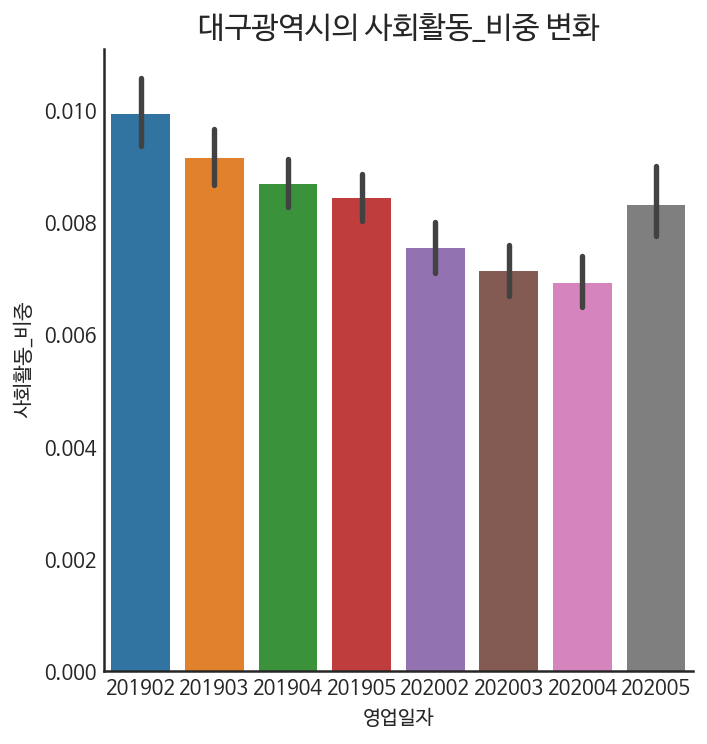

<Figure size 2160x720 with 0 Axes>

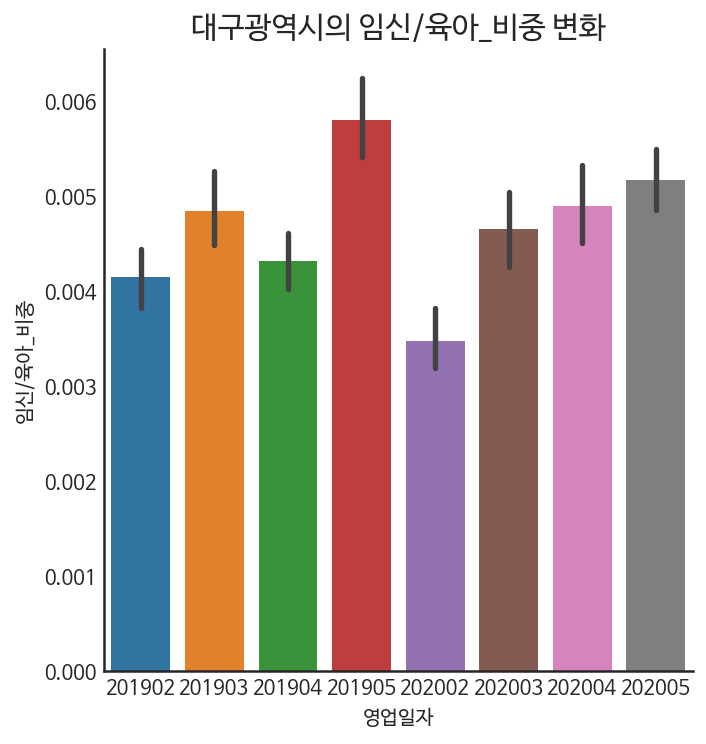

In [57]:
# 마찬가지로 대구광역시에 대해서도 조사해보자.
plt.style.use("seaborn-white")
plt.rc('font', family='NanumBarunGothic') 

for i in ['식사_비중','간식_비중','마실거리_비중','홈&리빙_비중','헬스&뷰티_비중','취미&여가활동_비중','사회활동_비중','임신/육아_비중']:

    plt.figure(figsize = (30, 10))
    sns.catplot(x = '영업일자',
                y = i,
                data = df6_daegu,
                kind = 'bar')

    plt.title("대구광역시의 " + i + " 변화", fontsize = 15)
    plt.show()

# 다음은 2019년 2~5월, 2020년 2~5월에서의 식사, 간식, 마실거리, 홈&리빙, 헬스&뷰티, 취미&여가활동, 사회활동, 임신/육아 비중의 변화이다.
# 2020년 2월은 코로나의 사회적영향력이 확대인 시기임을 감안하면, 

#

In [58]:
df6.head()

,영업일자,시코드,구코드,행정동코드,매출지수,식사_비중,간식_비중,마실거리_비중,홈&리빙_비중,헬스&뷰티_비중,취미&여가활동_비중,사회활동_비중,임신/육아_비중,비중합
0,201902,대구광역시,수성구,고산1동,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637,1.0
1,201902,대구광역시,수성구,고산2동,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913,1.0
2,201902,대구광역시,수성구,고산3동,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697,1.0
3,201902,대구광역시,수성구,두산동,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000,1.0
4,201902,대구광역시,수성구,만촌1동,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719,1.0


In [59]:
df6['영업일자'].value_counts() # 8가지로 분류됨

201903    1860
201905    1860
202003    1860
202005    1860
202004    1800
201904    1800
202002    1740
201902    1680
Name: 영업일자, dtype: int64

In [ ]:
new_date = []
for i in df6['영업일자']:
    if type(i) == str:
        if i[:]

Streaming output truncated to the last 5000 lines.
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
202003 <class 'str'>
2020

# 머신러닝 - 클러스터링 시도

클러스터링을 실행하기 전에 먼저 데이터 전처리를 해야 한다.

In [ ]:
df6.head()

,영업일자,시코드,구코드,행정동코드,매출지수,식사_비중,간식_비중,마실거리_비중,홈&리빙_비중,헬스&뷰티_비중,취미&여가활동_비중,사회활동_비중,임신/육아_비중,비중합
0,201902,대구광역시,수성구,고산1동,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637,1.0
1,201902,대구광역시,수성구,고산2동,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913,1.0
2,201902,대구광역시,수성구,고산3동,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697,1.0
3,201902,대구광역시,수성구,두산동,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000,1.0
4,201902,대구광역시,수성구,만촌1동,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719,1.0


In [62]:
df6['시코드'].value_counts()

서울특별시    7953
대구광역시    6507
Name: 시코드, dtype: int64

In [63]:
new_city = []

for i in df6['시코드']:
    if i == '서울특별시':
        new_city.append(0)  # 서울특별시는 0으로 매핑한다.
    elif i == '대구광역시':
        new_city.append(1)  # 대구광역시는 1로 매핑한다.

df6['시코드'] = new_city

In [65]:
df6.head()

,영업일자,시코드,구코드,행정동코드,매출지수,식사_비중,간식_비중,마실거리_비중,홈&리빙_비중,헬스&뷰티_비중,취미&여가활동_비중,사회활동_비중,임신/육아_비중,비중합
0,201902,1,수성구,고산1동,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637,1.0
1,201902,1,수성구,고산2동,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913,1.0
2,201902,1,수성구,고산3동,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697,1.0
3,201902,1,수성구,두산동,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000,1.0
4,201902,1,수성구,만촌1동,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719,1.0


In [68]:
# 행정동코드는 너무 작은 단위이므로 무시한다.
del df6['행정동코드']

In [69]:
df6.head()

,영업일자,시코드,구코드,매출지수,식사_비중,간식_비중,마실거리_비중,홈&리빙_비중,헬스&뷰티_비중,취미&여가활동_비중,사회활동_비중,임신/육아_비중,비중합
0,201902,1,수성구,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637,1.0
1,201902,1,수성구,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913,1.0
2,201902,1,수성구,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697,1.0
3,201902,1,수성구,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000,1.0
4,201902,1,수성구,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719,1.0


In [74]:
type(df6['영업일자'][2])

str

In [75]:

new_date = []
for i in df6['영업일자']:

    if i == '201902':
        new_date.append(0)
    elif i == '201903':
        new_date.append(1)
    elif i == '201904':
        new_date.append(2)
    elif i == '201905':
        new_date.append(3)
    
    elif i == '202002':
        new_date.append(4)
    elif i == '202003':
        new_date.append(5)
    elif i == '202004':
        new_date.append(6)
    elif i == '202005':
        new_date.append(7)

df6['영업일자'] = new_date

In [76]:
df6.head()

,영업일자,시코드,구코드,매출지수,식사_비중,간식_비중,마실거리_비중,홈&리빙_비중,헬스&뷰티_비중,취미&여가활동_비중,사회활동_비중,임신/육아_비중,비중합
0,0,1,수성구,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637,1.0
1,0,1,수성구,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913,1.0
2,0,1,수성구,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697,1.0
3,0,1,수성구,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000,1.0
4,0,1,수성구,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719,1.0


In [77]:
df6['구코드'].value_counts()

중구     5302
수성구    4820
노원구    4338
Name: 구코드, dtype: int64

In [86]:
new_gucode = []
for i, j in zip(df6['시코드'], df6['구코드']):


    if i == 0: # 서울특별시
        if j == '노원구':
            new_gucode.append(0)  # 서울특별시 노원구
        elif j == '중구':
            new_gucode.append(1)  # 서울특별시 중구

    elif i == 1: # 대구광역시
        if j == '수성구':   
            new_gucode.append(2)  # 대구광역시 수성구
        elif j == '중구':   
            new_gucode.append(3)  # 대구광역시 중구

df6['구코드'] = new_gucode

In [87]:
df6.head()

,영업일자,시코드,구코드,매출지수,식사_비중,간식_비중,마실거리_비중,홈&리빙_비중,헬스&뷰티_비중,취미&여가활동_비중,사회활동_비중,임신/육아_비중,비중합
0,0,1,2,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637,1.0
1,0,1,2,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913,1.0
2,0,1,2,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697,1.0
3,0,1,2,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000,1.0
4,0,1,2,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719,1.0


In [90]:
data = df6.iloc[:, :12]

In [91]:
data = np.array(data)
data.shape

(14460, 12)

# 클러스터링 실행

사이킷런에서 필요한 module을 import하여 시작한다.

In [120]:

from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [121]:
# 2차원 데이터 그려주는 함수
def plot_data(dataset, position, title):
    X, y = dataset
    plt.subplot(position)
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1])

In [122]:
# 2차원, 3차원 시각화 함수
def fit_predict_plot(model, dataset, position, title):
    X, y = dataset
    model.fit(X)
    if hasattr(model, 'labels_'):
        labels = model.labels_.astype(np.int)

    else:
        labels = model.predict(X)

    colors = np.array(['#30A9DE', '#E53A40', '#090707', '#A593E0', '#519D9E', '#D81159', '#8CD790', '#353866'])
    ax = plt.subplot(position)
    ax.set_title(title)
    ax.scatter(X[:, 0], X[:, 1], color = colors[labels])


In [124]:
# 10개의 클러스터를 형성하는 클러스터 모델 생성
model = cluster.KMeans(n_clusters = 10)
model.fit(data) # 모델 훈련

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [125]:
predict = model.predict(data) # 예측값을 predict에 저장

In [126]:
min(predict), max(predict) # 0부터 9까지 10종류의 라벨이 존재함

(0, 9)

In [127]:
predict.shape

(14460,)

In [128]:
print(data.shape)
print(predict.shape)

(14460, 12)
(14460,)


# 차원축소(manifold TSNE) 시작

앞서 클러스터링 모델을 통해 생성한 predict를 라벨데이터로 활용하여 고차원 특성 공간에

존재하는 데이터 분포를 저차원으로 시각화한다.

In [129]:
from sklearn import manifold
from sklearn import random_projection
from sklearn import datasets

In [130]:
# 시각화 및 정규화를 도와주는 함수 정의

def min_max_scale(x):
    min_value, max_value = np.min(x, 0), np.max(x, 0)
    x = (x - min_value) / (max_value - min_value)
    return x


def plot_s_curve(s_curve, color, position, projection):

    s_curve = min_max_scale(s_curve)
    if projection == "3d":
        ax = plt.subplot(position, projection = projection)
        ax.scatter(s_curve[:, 0], s_curve[:, 1], s_curve[:, 2], c = color, cmap = plt.cm.Spectral)
        ax.view_init(4, -72)

    elif projection == "2d":
        ax = plt.subplot(position)
        ax.scatter(s_curve[:, 0], s_curve[:, 1], c = color, cmap = plt.cm.Spectral)


def plot_digits(digits, labels, position, projection):
    digits = min_max_scale(digits)
    if projection == "3d":
        ax = plt.subplot(position, projection = projection)
        for i in range(digits.shape[0]):
            ax.text(digits[i, 0], digits[i, 1], digits[i, 2], str(labels[i]),
                    color = plt.cm.Set1(labels[i] / 10.), fontdict = {'weight':'bold',
                                                                      'size': 9})
        ax.view_init(4, -72)
    
    elif projection == '2d':

        ax = plt.subplot(position)
        for i in range(digits.shape[0]):
            ax.text(digits[i, 0], digits[i, 1], str(labels[i]),
                    color = plt.cm.Set1(labels[i] / 10.), fontdict = {"weight": "bold",
                                                                      "size" : 9})
            

In [131]:
# 2차원으로 저차원 시각화 : 10~20분 정도의 시간이 걸립니다.
df_tsne_2d = manifold.TSNE(n_components = 2, random_state = 111).fit_transform(data)

In [132]:
# 3차원으로 저차원 시각화 : 10~20분 정도의 시간이 걸립니다.
df_tsne_3d = manifold.TSNE(n_components = 3, random_state = 111).fit_transform(data)

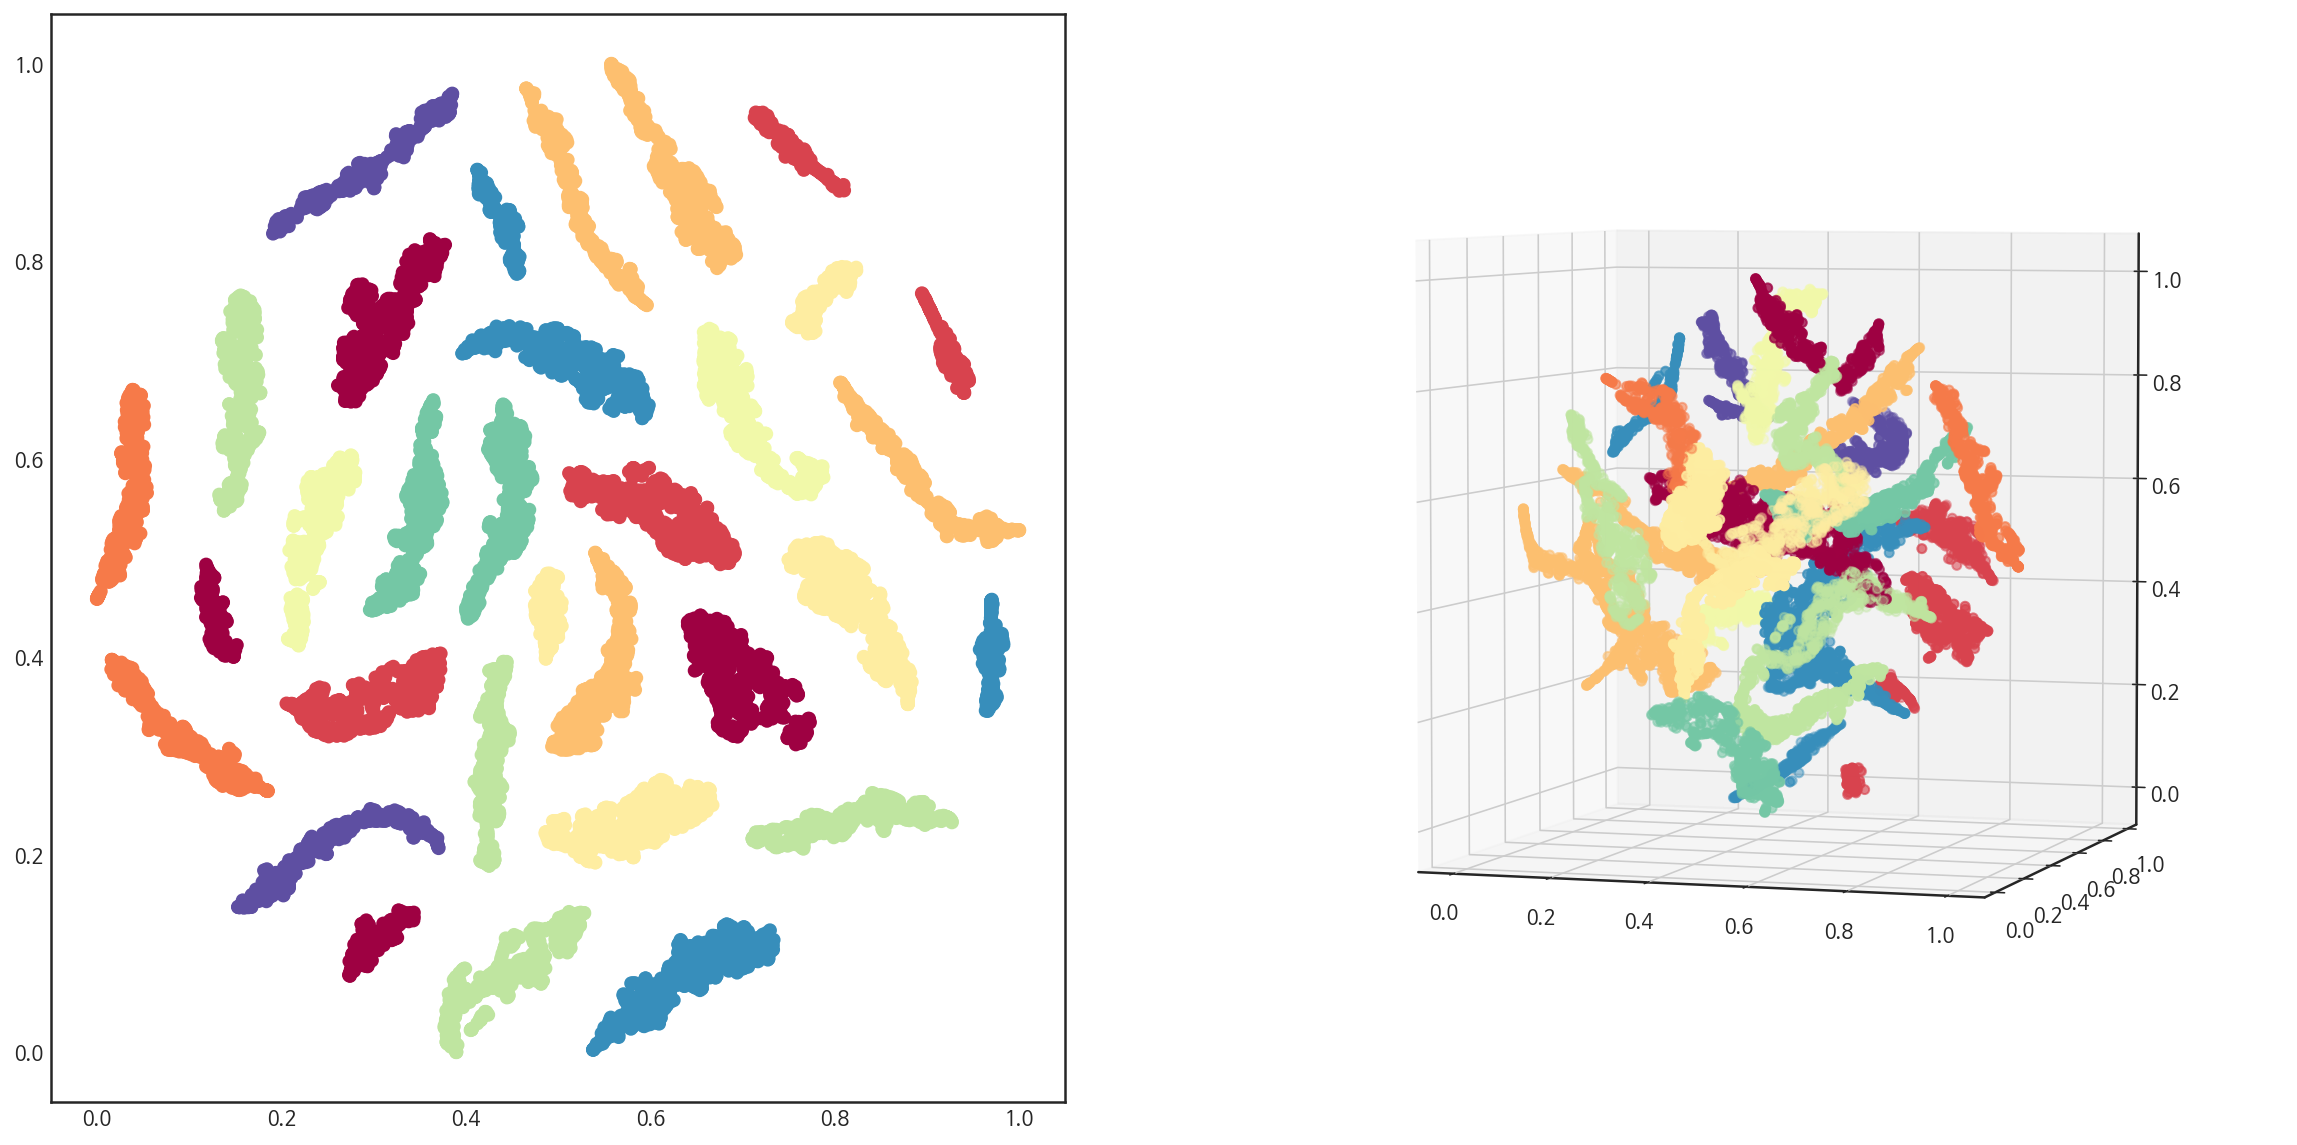

In [133]:
# 2차원, 3차원 시각화 확인
fig = plt.figure(figsize = (20, 10))
plot_s_curve(df_tsne_2d, predict, 121, '2d')
plot_s_curve(df_tsne_3d, predict, 122, '3d')